# MoE Profiling Examples

- Mixtral 8x7B "mistralai/Mixtral-8x7B-Instruct-v0.1"
    - A100-80GB GPU x 1
    - CPU 8 cores
    - RAM 32 GiB

In [ ]:
!nvidia-smi

## Don't restart after install try running notebook, if it doesn't work then restart

In [1]:
%uv pip install -q torch transformers pandas numpy accelerate bitsandbytes datasets tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install older version that OpenMoE expects
# %uv pip install transformers==4.40.0

In [3]:
# !git clone --branch my_openmoe https://github.com/Orion-Zheng/ColossalAI.git
# %uv pip install ./ColossalAI
# %uv pip install -q colossalai flash_attn --no-build-isolation

In [20]:
# In Colab - force reload without restarting runtime
# import sys
# import importlib

# # Remove from sys.modules if already loaded
# if 'profiler_v2' or 'profiler' in sys.modules:
#     del sys.modules['profiler_v2']
#     del sys.modules['profiler']
#     print('yes')

KeyError: 'profiler'

In [2]:
!git clone https://github.com/danielfang001/moe-profiler.git

Cloning into 'moe-profiler'...
remote: Enumerating objects: 357, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 357 (delta 73), reused 74 (delta 39), pack-reused 237 (from 1)
Receiving objects: 100% (357/357), 21.92 MiB | 33.51 MiB/s, done.
Resolving deltas: 100% (193/193), done.


In [3]:
import sys
sys.path.append('./moe-profiler')
# Import the profiler
from profiler_v2 import MOEProfiler

## 2. Mixtral 8x7B

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

# Example: Mixtral-8x7B (requires GPU with sufficient memory)
model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"

# Load with device_map for automatic GPU placement
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00012-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00013-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00014-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00015-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00016-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00017-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00018-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00019-of-00019.safetensors:   0%|          | 0.00/4.22G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/19 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [5]:
profiler = MOEProfiler(model)

Scanning model for MoE modules...
Found MoE module: model.layers.0.block_sparse_moe
  Type: MixtralSparseMoeBlock
  Architecture: mixtral
  Wrapper type: block
  Num experts: 8
  Hidden dim: 4096
  Expert dim: 14336
  Default top-k: 2
  Config source: model.config (auto-detected)
Found MoE module: model.layers.1.block_sparse_moe
  Type: MixtralSparseMoeBlock
  Architecture: mixtral
  Wrapper type: block
  Num experts: 8
  Hidden dim: 4096
  Expert dim: 14336
  Default top-k: 2
  Config source: model.config (auto-detected)
Found MoE module: model.layers.2.block_sparse_moe
  Type: MixtralSparseMoeBlock
  Architecture: mixtral
  Wrapper type: block
  Num experts: 8
  Hidden dim: 4096
  Expert dim: 14336
  Default top-k: 2
  Config source: model.config (auto-detected)
Found MoE module: model.layers.3.block_sparse_moe
  Type: MixtralSparseMoeBlock
  Architecture: mixtral
  Wrapper type: block
  Num experts: 8
  Hidden dim: 4096
  Expert dim: 14336
  Default top-k: 2
  Config source: model.c

In [7]:

from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import geometric_kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("arc_easy", split="test", num_samples=200)

acc_bench.run_evaluation("baseline", dataset, "arc_easy", selection_fn=None)
print('baseline done')
kneedle_k2 = partial(geometric_kneedle_selector, k_max=2)
acc_bench.run_evaluation("kneedle_k2", dataset, "arc_easy", selection_fn=kneedle_k2)
print('k2 done')
kneedle_k4 = partial(geometric_kneedle_selector, k_max=4)
acc_bench.run_evaluation("kneedle_k4", dataset, "arc_easy", selection_fn=kneedle_k4)
print('k4 done')


Loading arc_easy (test)...
  Randomly sampled 200 examples (seed=42)
Final dataset size: 200 examples

Evaluating: baseline on arc_easy
Removed selection function from 32 wrappers


Evaluating baseline:  25%|█████████████                                       | 50/200 [00:29<01:30,  1.65it/s]

  Progress: 50/200 | Accuracy: 98.00%


Evaluating baseline:  50%|█████████████████████████▌                         | 100/200 [00:58<00:59,  1.69it/s]

  Progress: 100/200 | Accuracy: 96.00%


Evaluating baseline:  75%|██████████████████████████████████████▎            | 150/200 [01:27<00:29,  1.70it/s]

  Progress: 150/200 | Accuracy: 94.67%


Evaluating baseline: 100%|███████████████████████████████████████████████████| 200/200 [01:56<00:00,  1.72it/s]


  Progress: 200/200 | Accuracy: 94.50%

--- Results for baseline ---
  Accuracy:     94.50% (189/200)
  Mean k:       2.00
  K range:      [2.0, 2.0]
  Mean FLOPs:   4.70e+08
  Mean latency: 2.89 ms
baseline done

Evaluating: kneedle_k2 on arc_easy
Applied selection function to 32 wrappers


Evaluating kneedle_k2:  25%|████████████▌                                     | 50/200 [00:33<01:56,  1.28it/s]

  Progress: 50/200 | Accuracy: 100.00%


Evaluating kneedle_k2:  50%|████████████████████████▌                        | 100/200 [01:12<01:17,  1.29it/s]

  Progress: 100/200 | Accuracy: 95.00%


Evaluating kneedle_k2:  75%|████████████████████████████████████▊            | 150/200 [01:50<00:37,  1.34it/s]

  Progress: 150/200 | Accuracy: 92.67%


Evaluating kneedle_k2: 100%|█████████████████████████████████████████████████| 200/200 [02:25<00:00,  1.38it/s]


  Progress: 200/200 | Accuracy: 92.00%

--- Results for kneedle_k2 ---
  Accuracy:     92.00% (184/200)
  Mean k:       2.00
  K range:      [1.0, 2.0]
  Mean FLOPs:   4.69e+08
  Mean latency: 3.62 ms
k2 done

Evaluating: kneedle_k4 on arc_easy
Applied selection function to 32 wrappers


Evaluating kneedle_k4:  25%|████████████▌                                     | 50/200 [00:44<02:17,  1.09it/s]

  Progress: 50/200 | Accuracy: 100.00%


Evaluating kneedle_k4:  50%|████████████████████████▌                        | 100/200 [01:28<01:29,  1.12it/s]

  Progress: 100/200 | Accuracy: 96.00%


Evaluating kneedle_k4:  75%|████████████████████████████████████▊            | 150/200 [02:12<00:44,  1.12it/s]

  Progress: 150/200 | Accuracy: 94.00%


Evaluating kneedle_k4: 100%|█████████████████████████████████████████████████| 200/200 [02:55<00:00,  1.14it/s]

  Progress: 200/200 | Accuracy: 93.50%

--- Results for kneedle_k4 ---
  Accuracy:     93.50% (187/200)
  Mean k:       2.81
  K range:      [1.0, 4.0]
  Mean FLOPs:   6.61e+08
  Mean latency: 4.76 ms
k4 done


In [8]:

from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("arc_challenge", split="test", num_samples=500)

acc_bench.run_evaluation("baseline", dataset, "arc_challenge", selection_fn=None)
print('baseline done')
kneedle_k2 = partial(geometric_kneedle_selector, k_max=2)
acc_bench.run_evaluation("kneedle_k2", dataset, "arc_challenge", selection_fn=kneedle_k2)
print('k2 done')
kneedle_k4 = partial(geometric_kneedle_selector, k_max=4)
acc_bench.run_evaluation("kneedle_k4", dataset, "arc_challenge", selection_fn=kneedle_k4)
print('k4 done')


Loading arc_challenge (test)...


ARC-Challenge/train-00000-of-00001.parqu(…):   0%|          | 0.00/190k [00:00<?, ?B/s]

ARC-Challenge/test-00000-of-00001.parque(…):   0%|          | 0.00/204k [00:00<?, ?B/s]

ARC-Challenge/validation-00000-of-00001.(…):   0%|          | 0.00/55.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1119 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1172 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/299 [00:00<?, ? examples/s]

  Randomly sampled 500 examples (seed=42)
Final dataset size: 500 examples

Evaluating: baseline on arc_challenge
Removed selection function from 32 wrappers


Evaluating baseline:  10%|█████▏                                              | 50/500 [00:31<04:16,  1.76it/s]

  Progress: 50/500 | Accuracy: 90.00%


Evaluating baseline:  20%|██████████▏                                        | 100/500 [01:02<03:48,  1.75it/s]

  Progress: 100/500 | Accuracy: 87.00%


Evaluating baseline:  30%|███████████████▎                                   | 150/500 [01:31<03:29,  1.67it/s]

  Progress: 150/500 | Accuracy: 85.33%


Evaluating baseline:  40%|████████████████████▍                              | 200/500 [02:03<03:03,  1.64it/s]

  Progress: 200/500 | Accuracy: 84.00%


Evaluating baseline:  50%|█████████████████████████▌                         | 250/500 [02:33<02:30,  1.66it/s]

  Progress: 250/500 | Accuracy: 84.80%


Evaluating baseline:  60%|██████████████████████████████▌                    | 300/500 [03:04<01:51,  1.79it/s]

  Progress: 300/500 | Accuracy: 84.00%


Evaluating baseline:  70%|███████████████████████████████████▋               | 350/500 [03:34<01:36,  1.55it/s]

  Progress: 350/500 | Accuracy: 84.00%


Evaluating baseline:  80%|████████████████████████████████████████▊          | 400/500 [04:07<01:02,  1.59it/s]

  Progress: 400/500 | Accuracy: 82.75%


Evaluating baseline:  90%|█████████████████████████████████████████████▉     | 450/500 [04:39<00:32,  1.56it/s]

  Progress: 450/500 | Accuracy: 83.56%


Evaluating baseline: 100%|███████████████████████████████████████████████████| 500/500 [05:11<00:00,  1.61it/s]

  Progress: 500/500 | Accuracy: 83.80%



--- Results for baseline ---
  Accuracy:     83.80% (419/500)
  Mean k:       2.00
  K range:      [2.0, 2.0]
  Mean FLOPs:   4.70e+08
  Mean latency: 3.08 ms
baseline done

Evaluating: kneedle_k2 on arc_challenge
Applied selection function to 32 wrappers


Evaluating kneedle_k2:  10%|█████                                             | 50/500 [00:36<04:58,  1.51it/s]

  Progress: 50/500 | Accuracy: 86.00%


Evaluating kneedle_k2:  20%|█████████▊                                       | 100/500 [01:11<04:12,  1.58it/s]

  Progress: 100/500 | Accuracy: 84.00%


Evaluating kneedle_k2:  30%|██████████████▋                                  | 150/500 [01:44<03:55,  1.49it/s]

  Progress: 150/500 | Accuracy: 82.00%


Evaluating kneedle_k2:  40%|███████████████████▌                             | 200/500 [02:19<03:27,  1.45it/s]

  Progress: 200/500 | Accuracy: 82.00%


Evaluating kneedle_k2:  50%|████████████████████████▌                        | 250/500 [02:53<02:47,  1.49it/s]

  Progress: 250/500 | Accuracy: 83.20%


Evaluating kneedle_k2:  60%|█████████████████████████████▍                   | 300/500 [03:28<02:02,  1.63it/s]

  Progress: 300/500 | Accuracy: 82.67%


Evaluating kneedle_k2:  70%|██████████████████████████████████▎              | 350/500 [04:01<01:46,  1.40it/s]

  Progress: 350/500 | Accuracy: 82.29%


Evaluating kneedle_k2:  80%|███████████████████████████████████████▏         | 400/500 [04:36<01:06,  1.51it/s]

  Progress: 400/500 | Accuracy: 80.50%


Evaluating kneedle_k2:  90%|████████████████████████████████████████████     | 450/500 [05:11<00:34,  1.44it/s]

  Progress: 450/500 | Accuracy: 81.33%


Evaluating kneedle_k2: 100%|█████████████████████████████████████████████████| 500/500 [05:46<00:00,  1.44it/s]

  Progress: 500/500 | Accuracy: 81.20%

--- Results for kneedle_k2 ---
  Accuracy:     81.20% (406/500)
  Mean k:       2.00
  K range:      [1.0, 2.0]
  Mean FLOPs:   4.69e+08
  Mean latency: 3.52 ms
k2 done

Evaluating: kneedle_k4 on arc_challenge
Applied selection function to 32 wrappers



Evaluating kneedle_k4:  10%|█████                                             | 50/500 [00:48<06:36,  1.13it/s]

  Progress: 50/500 | Accuracy: 92.00%


Evaluating kneedle_k4:  20%|█████████▊                                       | 100/500 [01:35<05:32,  1.20it/s]

  Progress: 100/500 | Accuracy: 89.00%


Evaluating kneedle_k4:  30%|██████████████▋                                  | 150/500 [02:27<06:19,  1.08s/it]

  Progress: 150/500 | Accuracy: 84.67%


Evaluating kneedle_k4:  40%|███████████████████▌                             | 200/500 [03:20<04:59,  1.00it/s]

  Progress: 200/500 | Accuracy: 84.00%


Evaluating kneedle_k4:  50%|████████████████████████▌                        | 250/500 [04:08<04:00,  1.04it/s]

  Progress: 250/500 | Accuracy: 84.80%


Evaluating kneedle_k4:  60%|█████████████████████████████▍                   | 300/500 [04:57<02:48,  1.18it/s]

  Progress: 300/500 | Accuracy: 83.33%


Evaluating kneedle_k4:  70%|██████████████████████████████████▎              | 350/500 [05:44<02:30,  1.01s/it]

  Progress: 350/500 | Accuracy: 83.14%


Evaluating kneedle_k4:  80%|███████████████████████████████████████▏         | 400/500 [06:34<01:32,  1.08it/s]

  Progress: 400/500 | Accuracy: 81.75%


Evaluating kneedle_k4:  90%|████████████████████████████████████████████     | 450/500 [07:23<00:49,  1.02it/s]

  Progress: 450/500 | Accuracy: 82.67%


Evaluating kneedle_k4: 100%|█████████████████████████████████████████████████| 500/500 [08:11<00:00,  1.02it/s]

  Progress: 500/500 | Accuracy: 82.40%



--- Results for kneedle_k4 ---
  Accuracy:     82.40% (412/500)
  Mean k:       2.82
  K range:      [1.0, 4.0]
  Mean FLOPs:   6.61e+08
  Mean latency: 5.27 ms
k4 done


In [8]:

from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("mmlu", mmlu_mode="full")

acc_bench.run_evaluation("baseline", dataset, "mmlu", selection_fn=None)
print('baseline done')
kneedle_k2 = partial(geometric_kneedle_selector, k_max=2)
acc_bench.run_evaluation("kneedle_k2", dataset, "mmlu", selection_fn=kneedle_k2)
print('k2 done')
kneedle_k4 = partial(geometric_kneedle_selector, k_max=4)
acc_bench.run_evaluation("kneedle_k4", dataset, "mmlu", selection_fn=kneedle_k4)
print('k4 done')


Loading mmlu (test)...
  MMLU Full mode: 57 subjects (this will take a while!)


Loading MMLU subjects:   0%|                                                            | 0/57 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

abstract_algebra/test-00000-of-00001.par(…):   0%|          | 0.00/9.96k [00:00<?, ?B/s]

abstract_algebra/validation-00000-of-000(…):   0%|          | 0.00/3.73k [00:00<?, ?B/s]

abstract_algebra/dev-00000-of-00001.parq(…):   0%|          | 0.00/3.45k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   2%|▉                                                   | 1/57 [00:04<03:54,  4.18s/it]

anatomy/test-00000-of-00001.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

anatomy/validation-00000-of-00001.parque(…):   0%|          | 0.00/5.28k [00:00<?, ?B/s]

anatomy/dev-00000-of-00001.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   4%|█▊                                                  | 2/57 [00:08<04:03,  4.43s/it]

astronomy/test-00000-of-00001.parquet:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

astronomy/validation-00000-of-00001.parq(…):   0%|          | 0.00/6.05k [00:00<?, ?B/s]

astronomy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/152 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   5%|██▋                                                 | 3/57 [00:11<03:15,  3.63s/it]

business_ethics/test-00000-of-00001.parq(…):   0%|          | 0.00/21.6k [00:00<?, ?B/s]

business_ethics/validation-00000-of-0000(…):   0%|          | 0.00/5.09k [00:00<?, ?B/s]

business_ethics/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   7%|███▋                                                | 4/57 [00:14<02:55,  3.31s/it]

clinical_knowledge/test-00000-of-00001.p(…):   0%|          | 0.00/40.5k [00:00<?, ?B/s]

clinical_knowledge/validation-00000-of-0(…):   0%|          | 0.00/7.48k [00:00<?, ?B/s]

clinical_knowledge/dev-00000-of-00001.pa(…):   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/265 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   9%|████▌                                               | 5/57 [00:17<02:50,  3.29s/it]

college_biology/test-00000-of-00001.parq(…):   0%|          | 0.00/31.8k [00:00<?, ?B/s]

college_biology/validation-00000-of-0000(…):   0%|          | 0.00/6.90k [00:00<?, ?B/s]

college_biology/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.27k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/144 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  11%|█████▍                                              | 6/57 [00:20<02:35,  3.05s/it]

college_chemistry/test-00000-of-00001.pa(…):   0%|          | 0.00/17.9k [00:00<?, ?B/s]

college_chemistry/validation-00000-of-00(…):   0%|          | 0.00/4.87k [00:00<?, ?B/s]

college_chemistry/dev-00000-of-00001.par(…):   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  12%|██████▍                                             | 7/57 [00:22<02:26,  2.93s/it]

college_computer_science/test-00000-of-0(…):   0%|          | 0.00/28.1k [00:00<?, ?B/s]

college_computer_science/validation-0000(…):   0%|          | 0.00/6.25k [00:00<?, ?B/s]

college_computer_science/dev-00000-of-00(…):   0%|          | 0.00/6.81k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  14%|███████▎                                            | 8/57 [00:25<02:18,  2.84s/it]

college_mathematics/test-00000-of-00001.(…):   0%|          | 0.00/16.6k [00:00<?, ?B/s]

college_mathematics/validation-00000-of-(…):   0%|          | 0.00/5.00k [00:00<?, ?B/s]

college_mathematics/dev-00000-of-00001.p(…):   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  16%|████████▏                                           | 9/57 [00:28<02:12,  2.76s/it]

college_medicine/test-00000-of-00001.par(…):   0%|          | 0.00/42.5k [00:00<?, ?B/s]

college_medicine/validation-00000-of-000(…):   0%|          | 0.00/8.99k [00:00<?, ?B/s]

college_medicine/dev-00000-of-00001.parq(…):   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/173 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  18%|████████▉                                          | 10/57 [00:30<02:06,  2.70s/it]

college_physics/test-00000-of-00001.parq(…):   0%|          | 0.00/18.6k [00:00<?, ?B/s]

college_physics/validation-00000-of-0000(…):   0%|          | 0.00/6.39k [00:00<?, ?B/s]

college_physics/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.51k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/102 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  19%|█████████▊                                         | 11/57 [00:33<02:02,  2.65s/it]

computer_security/test-00000-of-00001.pa(…):   0%|          | 0.00/19.1k [00:00<?, ?B/s]

computer_security/validation-00000-of-00(…):   0%|          | 0.00/6.67k [00:00<?, ?B/s]

computer_security/dev-00000-of-00001.par(…):   0%|          | 0.00/4.33k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  21%|██████████▋                                        | 12/57 [00:35<01:58,  2.64s/it]

conceptual_physics/test-00000-of-00001.p(…):   0%|          | 0.00/25.0k [00:00<?, ?B/s]

conceptual_physics/validation-00000-of-0(…):   0%|          | 0.00/5.98k [00:00<?, ?B/s]

conceptual_physics/dev-00000-of-00001.pa(…):   0%|          | 0.00/3.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/235 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  23%|███████████▋                                       | 13/57 [00:38<01:56,  2.64s/it]

econometrics/test-00000-of-00001.parquet:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

econometrics/validation-00000-of-00001.p(…):   0%|          | 0.00/7.02k [00:00<?, ?B/s]

econometrics/dev-00000-of-00001.parquet:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/114 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  25%|████████████▌                                      | 14/57 [00:41<01:53,  2.64s/it]

electrical_engineering/test-00000-of-000(…):   0%|          | 0.00/17.6k [00:00<?, ?B/s]

electrical_engineering/validation-00000-(…):   0%|          | 0.00/5.08k [00:00<?, ?B/s]

electrical_engineering/dev-00000-of-0000(…):   0%|          | 0.00/4.08k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/145 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  26%|█████████████▍                                     | 15/57 [00:43<01:49,  2.62s/it]

elementary_mathematics/test-00000-of-000(…):   0%|          | 0.00/41.1k [00:00<?, ?B/s]

elementary_mathematics/validation-00000-(…):   0%|          | 0.00/9.38k [00:00<?, ?B/s]

elementary_mathematics/dev-00000-of-0000(…):   0%|          | 0.00/4.55k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/378 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/41 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  28%|██████████████▎                                    | 16/57 [00:47<01:57,  2.87s/it]

formal_logic/test-00000-of-00001.parquet:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

formal_logic/validation-00000-of-00001.p(…):   0%|          | 0.00/6.56k [00:00<?, ?B/s]

formal_logic/dev-00000-of-00001.parquet:   0%|          | 0.00/4.81k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  30%|███████████████▏                                   | 17/57 [00:49<01:51,  2.79s/it]

global_facts/test-00000-of-00001.parquet:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

global_facts/validation-00000-of-00001.p(…):   0%|          | 0.00/4.19k [00:00<?, ?B/s]

global_facts/dev-00000-of-00001.parquet:   0%|          | 0.00/3.58k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  32%|████████████████                                   | 18/57 [00:52<01:46,  2.73s/it]

high_school_biology/test-00000-of-00001.(…):   0%|          | 0.00/62.7k [00:00<?, ?B/s]

high_school_biology/validation-00000-of-(…):   0%|          | 0.00/10.6k [00:00<?, ?B/s]

high_school_biology/dev-00000-of-00001.p(…):   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  33%|█████████████████                                  | 19/57 [00:55<01:44,  2.75s/it]

high_school_chemistry/test-00000-of-0000(…):   0%|          | 0.00/33.3k [00:00<?, ?B/s]

high_school_chemistry/validation-00000-o(…):   0%|          | 0.00/8.31k [00:00<?, ?B/s]

high_school_chemistry/dev-00000-of-00001(…):   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  35%|█████████████████▉                                 | 20/57 [00:58<01:45,  2.86s/it]

high_school_computer_science/test-00000-(…):   0%|          | 0.00/27.3k [00:00<?, ?B/s]

high_school_computer_science/validation-(…):   0%|          | 0.00/5.28k [00:00<?, ?B/s]

high_school_computer_science/dev-00000-o(…):   0%|          | 0.00/6.54k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  37%|██████████████████▊                                | 21/57 [01:00<01:40,  2.78s/it]

high_school_european_history/test-00000-(…):   0%|          | 0.00/142k [00:00<?, ?B/s]

high_school_european_history/validation-(…):   0%|          | 0.00/31.6k [00:00<?, ?B/s]

high_school_european_history/dev-00000-o(…):   0%|          | 0.00/22.2k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/165 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  39%|███████████████████▋                               | 22/57 [01:03<01:35,  2.72s/it]

high_school_geography/test-00000-of-0000(…):   0%|          | 0.00/28.2k [00:00<?, ?B/s]

high_school_geography/validation-00000-o(…):   0%|          | 0.00/6.16k [00:00<?, ?B/s]

high_school_geography/dev-00000-of-00001(…):   0%|          | 0.00/3.93k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/198 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  40%|████████████████████▌                              | 23/57 [01:06<01:31,  2.70s/it]

high_school_government_and_politics/test(…):   0%|          | 0.00/40.2k [00:00<?, ?B/s]

high_school_government_and_politics/vali(…):   0%|          | 0.00/8.27k [00:00<?, ?B/s]

high_school_government_and_politics/dev-(…):   0%|          | 0.00/4.47k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/193 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  42%|█████████████████████▍                             | 24/57 [01:08<01:29,  2.70s/it]

high_school_macroeconomics/test-00000-of(…):   0%|          | 0.00/54.8k [00:00<?, ?B/s]

high_school_macroeconomics/validation-00(…):   0%|          | 0.00/9.89k [00:00<?, ?B/s]

high_school_macroeconomics/dev-00000-of-(…):   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/390 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/43 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  44%|██████████████████████▎                            | 25/57 [01:11<01:25,  2.67s/it]

high_school_mathematics/test-00000-of-00(…):   0%|          | 0.00/33.7k [00:00<?, ?B/s]

high_school_mathematics/validation-00000(…):   0%|          | 0.00/6.99k [00:00<?, ?B/s]

high_school_mathematics/dev-00000-of-000(…):   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/270 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  46%|███████████████████████▎                           | 26/57 [01:13<01:22,  2.65s/it]

high_school_microeconomics/test-00000-of(…):   0%|          | 0.00/38.8k [00:00<?, ?B/s]

high_school_microeconomics/validation-00(…):   0%|          | 0.00/7.22k [00:00<?, ?B/s]

high_school_microeconomics/dev-00000-of-(…):   0%|          | 0.00/3.83k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/238 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  47%|████████████████████████▏                          | 27/57 [01:16<01:22,  2.75s/it]

high_school_physics/test-00000-of-00001.(…):   0%|          | 0.00/33.0k [00:00<?, ?B/s]

high_school_physics/validation-00000-of-(…):   0%|          | 0.00/7.96k [00:00<?, ?B/s]

high_school_physics/dev-00000-of-00001.p(…):   0%|          | 0.00/4.57k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/151 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/17 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  49%|█████████████████████████                          | 28/57 [01:19<01:19,  2.73s/it]

high_school_psychology/test-00000-of-000(…):   0%|          | 0.00/92.8k [00:00<?, ?B/s]

high_school_psychology/validation-00000-(…):   0%|          | 0.00/15.2k [00:00<?, ?B/s]

high_school_psychology/dev-00000-of-0000(…):   0%|          | 0.00/5.18k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/545 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/60 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  51%|█████████████████████████▉                         | 29/57 [01:22<01:15,  2.71s/it]

high_school_statistics/test-00000-of-000(…):   0%|          | 0.00/58.0k [00:00<?, ?B/s]

high_school_statistics/validation-00000-(…):   0%|          | 0.00/10.9k [00:00<?, ?B/s]

high_school_statistics/dev-00000-of-0000(…):   0%|          | 0.00/6.07k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/216 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  53%|██████████████████████████▊                        | 30/57 [01:25<01:17,  2.86s/it]

high_school_us_history/test-00000-of-000(…):   0%|          | 0.00/155k [00:00<?, ?B/s]

high_school_us_history/validation-00000-(…):   0%|          | 0.00/27.3k [00:00<?, ?B/s]

high_school_us_history/dev-00000-of-0000(…):   0%|          | 0.00/17.8k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/204 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  54%|███████████████████████████▋                       | 31/57 [01:28<01:12,  2.78s/it]

high_school_world_history/test-00000-of-(…):   0%|          | 0.00/202k [00:00<?, ?B/s]

high_school_world_history/validation-000(…):   0%|          | 0.00/38.5k [00:00<?, ?B/s]

high_school_world_history/dev-00000-of-0(…):   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/237 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  56%|████████████████████████████▋                      | 32/57 [01:30<01:08,  2.74s/it]

human_aging/test-00000-of-00001.parquet:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

human_aging/validation-00000-of-00001.pa(…):   0%|          | 0.00/6.28k [00:00<?, ?B/s]

human_aging/dev-00000-of-00001.parquet:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/223 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  58%|█████████████████████████████▌                     | 33/57 [01:33<01:04,  2.70s/it]

human_sexuality/test-00000-of-00001.parq(…):   0%|          | 0.00/23.2k [00:00<?, ?B/s]

human_sexuality/validation-00000-of-0000(…):   0%|          | 0.00/5.26k [00:00<?, ?B/s]

human_sexuality/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.08k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/131 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  60%|██████████████████████████████▍                    | 34/57 [01:35<01:01,  2.68s/it]

international_law/test-00000-of-00001.pa(…):   0%|          | 0.00/29.5k [00:00<?, ?B/s]

international_law/validation-00000-of-00(…):   0%|          | 0.00/7.12k [00:00<?, ?B/s]

international_law/dev-00000-of-00001.par(…):   0%|          | 0.00/4.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/121 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  61%|███████████████████████████████▎                   | 35/57 [01:38<01:01,  2.77s/it]

jurisprudence/test-00000-of-00001.parque(…):   0%|          | 0.00/23.3k [00:00<?, ?B/s]

jurisprudence/validation-00000-of-00001.(…):   0%|          | 0.00/6.21k [00:00<?, ?B/s]

jurisprudence/dev-00000-of-00001.parquet:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/108 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  63%|████████████████████████████████▏                  | 36/57 [01:41<00:57,  2.76s/it]

logical_fallacies/test-00000-of-00001.pa(…):   0%|          | 0.00/23.0k [00:00<?, ?B/s]

logical_fallacies/validation-00000-of-00(…):   0%|          | 0.00/6.52k [00:00<?, ?B/s]

logical_fallacies/dev-00000-of-00001.par(…):   0%|          | 0.00/4.12k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/163 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  65%|█████████████████████████████████                  | 37/57 [01:44<00:54,  2.71s/it]

machine_learning/test-00000-of-00001.par(…):   0%|          | 0.00/19.7k [00:00<?, ?B/s]

machine_learning/validation-00000-of-000(…):   0%|          | 0.00/6.17k [00:00<?, ?B/s]

machine_learning/dev-00000-of-00001.parq(…):   0%|          | 0.00/5.25k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/112 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  67%|██████████████████████████████████                 | 38/57 [01:47<00:52,  2.78s/it]

management/test-00000-of-00001.parquet:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

management/validation-00000-of-00001.par(…):   0%|          | 0.00/4.50k [00:00<?, ?B/s]

management/dev-00000-of-00001.parquet:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/103 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  68%|██████████████████████████████████▉                | 39/57 [01:50<00:51,  2.85s/it]

marketing/test-00000-of-00001.parquet:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

marketing/validation-00000-of-00001.parq(…):   0%|          | 0.00/8.21k [00:00<?, ?B/s]

marketing/dev-00000-of-00001.parquet:   0%|          | 0.00/4.28k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/234 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  70%|███████████████████████████████████▊               | 40/57 [01:52<00:47,  2.81s/it]

medical_genetics/test-00000-of-00001.par(…):   0%|          | 0.00/16.4k [00:00<?, ?B/s]

medical_genetics/validation-00000-of-000(…):   0%|          | 0.00/5.63k [00:00<?, ?B/s]

medical_genetics/dev-00000-of-00001.parq(…):   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  72%|████████████████████████████████████▋              | 41/57 [01:55<00:43,  2.74s/it]

miscellaneous/test-00000-of-00001.parque(…):   0%|          | 0.00/98.6k [00:00<?, ?B/s]

miscellaneous/validation-00000-of-00001.(…):   0%|          | 0.00/13.2k [00:00<?, ?B/s]

miscellaneous/dev-00000-of-00001.parquet:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/783 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/86 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  74%|█████████████████████████████████████▌             | 42/57 [01:58<00:40,  2.71s/it]

moral_disputes/test-00000-of-00001.parqu(…):   0%|          | 0.00/60.9k [00:00<?, ?B/s]

moral_disputes/validation-00000-of-00001(…):   0%|          | 0.00/10.7k [00:00<?, ?B/s]

moral_disputes/dev-00000-of-00001.parque(…):   0%|          | 0.00/4.41k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/346 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/38 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  75%|██████████████████████████████████████▍            | 43/57 [02:00<00:37,  2.68s/it]

moral_scenarios/test-00000-of-00001.parq(…):   0%|          | 0.00/89.8k [00:00<?, ?B/s]

moral_scenarios/validation-00000-of-0000(…):   0%|          | 0.00/14.9k [00:00<?, ?B/s]

moral_scenarios/dev-00000-of-00001.parqu(…):   0%|          | 0.00/5.14k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/895 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  77%|███████████████████████████████████████▎           | 44/57 [02:03<00:36,  2.83s/it]

nutrition/test-00000-of-00001.parquet:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

nutrition/validation-00000-of-00001.parq(…):   0%|          | 0.00/9.02k [00:00<?, ?B/s]

nutrition/dev-00000-of-00001.parquet:   0%|          | 0.00/4.99k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/306 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/33 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  79%|████████████████████████████████████████▎          | 45/57 [02:06<00:33,  2.83s/it]

philosophy/test-00000-of-00001.parquet:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

philosophy/validation-00000-of-00001.par(…):   0%|          | 0.00/9.15k [00:00<?, ?B/s]

philosophy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.20k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/311 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/34 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  81%|█████████████████████████████████████████▏         | 46/57 [02:09<00:30,  2.77s/it]

prehistory/test-00000-of-00001.parquet:   0%|          | 0.00/54.3k [00:00<?, ?B/s]

prehistory/validation-00000-of-00001.par(…):   0%|          | 0.00/9.89k [00:00<?, ?B/s]

prehistory/dev-00000-of-00001.parquet:   0%|          | 0.00/4.62k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/35 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  82%|██████████████████████████████████████████         | 47/57 [02:12<00:27,  2.75s/it]

professional_accounting/test-00000-of-00(…):   0%|          | 0.00/69.5k [00:00<?, ?B/s]

professional_accounting/validation-00000(…):   0%|          | 0.00/12.9k [00:00<?, ?B/s]

professional_accounting/dev-00000-of-000(…):   0%|          | 0.00/4.89k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/282 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  84%|██████████████████████████████████████████▉        | 48/57 [02:15<00:25,  2.82s/it]

professional_law/test-00000-of-00001.par(…):   0%|          | 0.00/1.04M [00:00<?, ?B/s]

professional_law/validation-00000-of-000(…):   0%|          | 0.00/116k [00:00<?, ?B/s]

professional_law/dev-00000-of-00001.parq(…):   0%|          | 0.00/15.1k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1534 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/170 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  86%|███████████████████████████████████████████▊       | 49/57 [02:18<00:23,  2.88s/it]

professional_medicine/test-00000-of-0000(…):   0%|          | 0.00/125k [00:00<?, ?B/s]

professional_medicine/validation-00000-o(…):   0%|          | 0.00/19.9k [00:00<?, ?B/s]

professional_medicine/dev-00000-of-00001(…):   0%|          | 0.00/8.45k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  88%|████████████████████████████████████████████▋      | 50/57 [02:20<00:19,  2.80s/it]

professional_psychology/test-00000-of-00(…):   0%|          | 0.00/133k [00:00<?, ?B/s]

professional_psychology/validation-00000(…):   0%|          | 0.00/22.1k [00:00<?, ?B/s]

professional_psychology/dev-00000-of-000(…):   0%|          | 0.00/4.69k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/612 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/69 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  89%|█████████████████████████████████████████████▋     | 51/57 [02:23<00:16,  2.74s/it]

public_relations/test-00000-of-00001.par(…):   0%|          | 0.00/20.6k [00:00<?, ?B/s]

public_relations/validation-00000-of-000(…):   0%|          | 0.00/6.45k [00:00<?, ?B/s]

public_relations/dev-00000-of-00001.parq(…):   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/110 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  91%|██████████████████████████████████████████████▌    | 52/57 [02:26<00:14,  2.81s/it]

security_studies/test-00000-of-00001.par(…):   0%|          | 0.00/114k [00:00<?, ?B/s]

security_studies/validation-00000-of-000(…):   0%|          | 0.00/18.7k [00:00<?, ?B/s]

security_studies/dev-00000-of-00001.parq(…):   0%|          | 0.00/7.49k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/245 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/27 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  93%|███████████████████████████████████████████████▍   | 53/57 [02:28<00:11,  2.75s/it]

sociology/test-00000-of-00001.parquet:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

sociology/validation-00000-of-00001.parq(…):   0%|          | 0.00/8.36k [00:00<?, ?B/s]

sociology/dev-00000-of-00001.parquet:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/201 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  95%|████████████████████████████████████████████████▎  | 54/57 [02:31<00:08,  2.72s/it]

us_foreign_policy/test-00000-of-00001.pa(…):   0%|          | 0.00/19.5k [00:00<?, ?B/s]

us_foreign_policy/validation-00000-of-00(…):   0%|          | 0.00/5.27k [00:00<?, ?B/s]

us_foreign_policy/dev-00000-of-00001.par(…):   0%|          | 0.00/4.22k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  96%|█████████████████████████████████████████████████▏ | 55/57 [02:34<00:05,  2.69s/it]

virology/test-00000-of-00001.parquet:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

virology/validation-00000-of-00001.parqu(…):   0%|          | 0.00/7.05k [00:00<?, ?B/s]

virology/dev-00000-of-00001.parquet:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/166 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  98%|██████████████████████████████████████████████████ | 56/57 [02:36<00:02,  2.68s/it]

world_religions/test-00000-of-00001.parq(…):   0%|          | 0.00/18.9k [00:00<?, ?B/s]

world_religions/validation-00000-of-0000(…):   0%|          | 0.00/4.94k [00:00<?, ?B/s]

world_religions/dev-00000-of-00001.parqu(…):   0%|          | 0.00/3.30k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/171 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/19 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects: 100%|███████████████████████████████████████████████████| 57/57 [02:39<00:00,  2.80s/it]


  Loaded 14042 total MMLU questions from 57 subjects
Final dataset size: 14042 examples

Evaluating: baseline on mmlu
Removed selection function from 64 wrappers


Evaluating baseline:   0%|▏                                               | 50/14042 [00:45<3:24:25,  1.14it/s]

  Progress: 50/14042 | Accuracy: 36.00%


Evaluating baseline:   1%|▎                                              | 100/14042 [01:29<3:15:14,  1.19it/s]

  Progress: 100/14042 | Accuracy: 35.00%


Evaluating baseline:   1%|▌                                              | 150/14042 [02:16<3:57:36,  1.03s/it]

  Progress: 150/14042 | Accuracy: 44.00%


Evaluating baseline:   1%|▋                                              | 200/14042 [03:04<3:51:27,  1.00s/it]

  Progress: 200/14042 | Accuracy: 48.50%


Evaluating baseline:   2%|▊                                              | 250/14042 [03:51<3:53:54,  1.02s/it]

  Progress: 250/14042 | Accuracy: 54.40%


Evaluating baseline:   2%|█                                              | 300/14042 [04:42<3:35:04,  1.06it/s]

  Progress: 300/14042 | Accuracy: 59.00%


Evaluating baseline:   2%|█▏                                             | 350/14042 [05:31<3:59:47,  1.05s/it]

  Progress: 350/14042 | Accuracy: 61.71%


Evaluating baseline:   3%|█▎                                             | 400/14042 [06:21<3:49:03,  1.01s/it]

  Progress: 400/14042 | Accuracy: 64.00%


Evaluating baseline:   3%|█▌                                             | 450/14042 [07:12<3:43:14,  1.01it/s]

  Progress: 450/14042 | Accuracy: 64.89%


Evaluating baseline:   4%|█▋                                             | 500/14042 [08:01<3:59:15,  1.06s/it]

  Progress: 500/14042 | Accuracy: 64.00%


Evaluating baseline:   4%|█▊                                             | 550/14042 [08:47<3:31:21,  1.06it/s]

  Progress: 550/14042 | Accuracy: 64.55%


Evaluating baseline:   4%|██                                             | 600/14042 [09:33<3:22:33,  1.11it/s]

  Progress: 600/14042 | Accuracy: 66.00%


Evaluating baseline:   5%|██▏                                            | 650/14042 [10:19<3:50:36,  1.03s/it]

  Progress: 650/14042 | Accuracy: 66.77%


Evaluating baseline:   5%|██▎                                            | 700/14042 [11:05<3:26:45,  1.08it/s]

  Progress: 700/14042 | Accuracy: 68.29%


Evaluating baseline:   5%|██▌                                            | 750/14042 [11:51<3:19:13,  1.11it/s]

  Progress: 750/14042 | Accuracy: 69.20%


Evaluating baseline:   6%|██▋                                            | 800/14042 [12:41<4:02:48,  1.10s/it]

  Progress: 800/14042 | Accuracy: 70.00%


Evaluating baseline:   6%|██▊                                            | 850/14042 [13:33<3:59:46,  1.09s/it]

  Progress: 850/14042 | Accuracy: 70.24%


Evaluating baseline:   6%|███                                            | 900/14042 [14:27<3:45:20,  1.03s/it]

  Progress: 900/14042 | Accuracy: 70.89%


Evaluating baseline:   7%|███▏                                           | 950/14042 [15:21<3:53:31,  1.07s/it]

  Progress: 950/14042 | Accuracy: 69.58%


Evaluating baseline:   7%|███▎                                          | 1000/14042 [16:15<5:39:37,  1.56s/it]

  Progress: 1000/14042 | Accuracy: 69.00%


Evaluating baseline:   7%|███▍                                          | 1050/14042 [17:13<4:05:54,  1.14s/it]

  Progress: 1050/14042 | Accuracy: 68.57%


Evaluating baseline:   8%|███▌                                          | 1100/14042 [18:15<3:38:55,  1.01s/it]

  Progress: 1100/14042 | Accuracy: 68.36%


Evaluating baseline:   8%|███▊                                          | 1150/14042 [19:08<3:02:50,  1.18it/s]

  Progress: 1150/14042 | Accuracy: 67.22%


Evaluating baseline:   9%|███▉                                          | 1200/14042 [19:57<3:25:05,  1.04it/s]

  Progress: 1200/14042 | Accuracy: 65.83%


Evaluating baseline:   9%|████                                          | 1250/14042 [21:08<6:04:55,  1.71s/it]

  Progress: 1250/14042 | Accuracy: 66.24%


Evaluating baseline:   9%|████▎                                         | 1300/14042 [22:18<3:29:37,  1.01it/s]

  Progress: 1300/14042 | Accuracy: 66.38%


Evaluating baseline:  10%|████▍                                         | 1350/14042 [23:10<3:51:47,  1.10s/it]

  Progress: 1350/14042 | Accuracy: 66.59%


Evaluating baseline:  10%|████▌                                         | 1400/14042 [24:09<3:57:16,  1.13s/it]

  Progress: 1400/14042 | Accuracy: 66.43%


Evaluating baseline:  10%|████▊                                         | 1450/14042 [25:07<4:39:43,  1.33s/it]

  Progress: 1450/14042 | Accuracy: 65.72%


Evaluating baseline:  11%|████▉                                         | 1500/14042 [26:03<3:46:50,  1.09s/it]

  Progress: 1500/14042 | Accuracy: 65.27%


Evaluating baseline:  11%|█████                                         | 1550/14042 [26:50<3:16:53,  1.06it/s]

  Progress: 1550/14042 | Accuracy: 65.87%


Evaluating baseline:  11%|█████▏                                        | 1600/14042 [27:31<2:57:12,  1.17it/s]

  Progress: 1600/14042 | Accuracy: 65.94%


Evaluating baseline:  12%|█████▍                                        | 1650/14042 [28:11<2:43:25,  1.26it/s]

  Progress: 1650/14042 | Accuracy: 65.88%


Evaluating baseline:  12%|█████▌                                        | 1700/14042 [28:50<2:33:00,  1.34it/s]

  Progress: 1700/14042 | Accuracy: 65.47%


Evaluating baseline:  12%|█████▋                                        | 1750/14042 [29:27<2:47:14,  1.22it/s]

  Progress: 1750/14042 | Accuracy: 65.20%


Evaluating baseline:  13%|█████▉                                        | 1800/14042 [30:05<2:25:53,  1.40it/s]

  Progress: 1800/14042 | Accuracy: 65.44%


Evaluating baseline:  13%|██████                                        | 1850/14042 [31:01<4:33:18,  1.35s/it]

  Progress: 1850/14042 | Accuracy: 65.14%


Evaluating baseline:  14%|██████▏                                       | 1900/14042 [32:00<4:22:31,  1.30s/it]

  Progress: 1900/14042 | Accuracy: 64.95%


Evaluating baseline:  14%|██████▍                                       | 1950/14042 [32:50<2:39:26,  1.26it/s]

  Progress: 1950/14042 | Accuracy: 64.82%


Evaluating baseline:  14%|██████▌                                       | 2000/14042 [33:29<2:33:47,  1.31it/s]

  Progress: 2000/14042 | Accuracy: 64.80%


Evaluating baseline:  15%|██████▋                                       | 2050/14042 [34:09<2:58:08,  1.12it/s]

  Progress: 2050/14042 | Accuracy: 64.78%


Evaluating baseline:  15%|██████▉                                       | 2100/14042 [34:50<3:09:59,  1.05it/s]

  Progress: 2100/14042 | Accuracy: 64.38%


Evaluating baseline:  15%|███████                                       | 2150/14042 [35:36<2:54:18,  1.14it/s]

  Progress: 2150/14042 | Accuracy: 63.86%


Evaluating baseline:  16%|███████▏                                      | 2200/14042 [36:23<3:04:57,  1.07it/s]

  Progress: 2200/14042 | Accuracy: 63.18%


Evaluating baseline:  16%|███████▎                                      | 2250/14042 [37:09<2:56:23,  1.11it/s]

  Progress: 2250/14042 | Accuracy: 62.89%


Evaluating baseline:  16%|███████▌                                      | 2300/14042 [37:54<2:55:12,  1.12it/s]

  Progress: 2300/14042 | Accuracy: 62.52%


Evaluating baseline:  17%|███████▋                                      | 2350/14042 [38:42<3:44:56,  1.15s/it]

  Progress: 2350/14042 | Accuracy: 62.04%


Evaluating baseline:  17%|███████▊                                      | 2400/14042 [39:28<2:26:51,  1.32it/s]

  Progress: 2400/14042 | Accuracy: 61.67%


Evaluating baseline:  17%|████████                                      | 2450/14042 [40:15<4:11:22,  1.30s/it]

  Progress: 2450/14042 | Accuracy: 61.27%


Evaluating baseline:  18%|████████▏                                     | 2500/14042 [41:16<3:34:36,  1.12s/it]

  Progress: 2500/14042 | Accuracy: 60.80%


Evaluating baseline:  18%|████████▎                                     | 2550/14042 [42:22<3:33:01,  1.11s/it]

  Progress: 2550/14042 | Accuracy: 60.63%


Evaluating baseline:  19%|████████▌                                     | 2600/14042 [43:13<2:43:48,  1.16it/s]

  Progress: 2600/14042 | Accuracy: 60.23%


Evaluating baseline:  19%|████████▋                                     | 2650/14042 [43:57<2:50:58,  1.11it/s]

  Progress: 2650/14042 | Accuracy: 59.62%


Evaluating baseline:  19%|████████▊                                     | 2700/14042 [44:45<3:20:10,  1.06s/it]

  Progress: 2700/14042 | Accuracy: 59.81%


Evaluating baseline:  20%|█████████                                     | 2750/14042 [45:36<3:06:30,  1.01it/s]

  Progress: 2750/14042 | Accuracy: 60.18%


Evaluating baseline:  20%|█████████▏                                    | 2800/14042 [46:29<3:04:04,  1.02it/s]

  Progress: 2800/14042 | Accuracy: 60.57%


Evaluating baseline:  20%|█████████▎                                    | 2850/14042 [47:23<3:06:55,  1.00s/it]

  Progress: 2850/14042 | Accuracy: 61.12%


Evaluating baseline:  21%|█████████▌                                    | 2900/14042 [48:17<2:47:35,  1.11it/s]

  Progress: 2900/14042 | Accuracy: 61.52%


Evaluating baseline:  21%|█████████▋                                    | 2950/14042 [49:10<3:03:51,  1.01it/s]

  Progress: 2950/14042 | Accuracy: 61.90%


Evaluating baseline:  21%|█████████▊                                    | 3000/14042 [50:00<2:52:11,  1.07it/s]

  Progress: 3000/14042 | Accuracy: 62.07%


Evaluating baseline:  22%|█████████▉                                    | 3050/14042 [50:50<2:59:27,  1.02it/s]

  Progress: 3050/14042 | Accuracy: 61.87%


Evaluating baseline:  22%|██████████▏                                   | 3100/14042 [51:46<3:02:09,  1.00it/s]

  Progress: 3100/14042 | Accuracy: 61.77%


Evaluating baseline:  22%|██████████▎                                   | 3150/14042 [52:42<3:40:12,  1.21s/it]

  Progress: 3150/14042 | Accuracy: 61.78%


Evaluating baseline:  23%|██████████▍                                   | 3200/14042 [53:38<3:49:32,  1.27s/it]

  Progress: 3200/14042 | Accuracy: 61.88%


Evaluating baseline:  23%|██████████▋                                   | 3250/14042 [54:40<4:33:07,  1.52s/it]

  Progress: 3250/14042 | Accuracy: 62.06%


Evaluating baseline:  24%|██████████▊                                   | 3300/14042 [56:12<9:16:19,  3.11s/it]

  Progress: 3300/14042 | Accuracy: 62.03%


Evaluating baseline:  24%|██████████▉                                   | 3350/14042 [58:46<9:01:07,  3.04s/it]

  Progress: 3350/14042 | Accuracy: 62.30%


Evaluating baseline:  24%|██████████▋                                 | 3400/14042 [1:01:27<9:28:27,  3.21s/it]

  Progress: 3400/14042 | Accuracy: 62.53%


Evaluating baseline:  25%|██████████▊                                 | 3450/14042 [1:03:57<3:49:46,  1.30s/it]

  Progress: 3450/14042 | Accuracy: 62.78%


Evaluating baseline:  25%|██████████▉                                 | 3500/14042 [1:04:37<2:30:12,  1.17it/s]

  Progress: 3500/14042 | Accuracy: 62.97%


Evaluating baseline:  25%|███████████                                 | 3550/14042 [1:05:17<2:26:40,  1.19it/s]

  Progress: 3550/14042 | Accuracy: 63.24%


Evaluating baseline:  26%|███████████▎                                | 3600/14042 [1:05:57<2:01:54,  1.43it/s]

  Progress: 3600/14042 | Accuracy: 63.53%


Evaluating baseline:  26%|███████████▍                                | 3650/14042 [1:06:43<2:53:02,  1.00it/s]

  Progress: 3650/14042 | Accuracy: 63.86%


Evaluating baseline:  26%|███████████▌                                | 3700/14042 [1:07:41<3:16:04,  1.14s/it]

  Progress: 3700/14042 | Accuracy: 64.24%


Evaluating baseline:  27%|███████████▊                                | 3750/14042 [1:08:35<2:58:33,  1.04s/it]

  Progress: 3750/14042 | Accuracy: 64.64%


Evaluating baseline:  27%|███████████▉                                | 3800/14042 [1:09:28<2:45:48,  1.03it/s]

  Progress: 3800/14042 | Accuracy: 65.00%


Evaluating baseline:  27%|████████████                                | 3850/14042 [1:10:18<2:28:50,  1.14it/s]

  Progress: 3850/14042 | Accuracy: 65.30%


Evaluating baseline:  28%|████████████▏                               | 3900/14042 [1:11:15<2:43:36,  1.03it/s]

  Progress: 3900/14042 | Accuracy: 65.51%


Evaluating baseline:  28%|████████████▍                               | 3950/14042 [1:12:04<2:39:24,  1.06it/s]

  Progress: 3950/14042 | Accuracy: 65.65%


Evaluating baseline:  28%|████████████▌                               | 4000/14042 [1:12:59<3:08:15,  1.12s/it]

  Progress: 4000/14042 | Accuracy: 65.67%


Evaluating baseline:  29%|████████████▋                               | 4050/14042 [1:13:51<2:45:34,  1.01it/s]

  Progress: 4050/14042 | Accuracy: 65.65%


Evaluating baseline:  29%|████████████▊                               | 4100/14042 [1:14:44<2:53:46,  1.05s/it]

  Progress: 4100/14042 | Accuracy: 65.71%


Evaluating baseline:  30%|█████████████                               | 4150/14042 [1:15:32<2:45:59,  1.01s/it]

  Progress: 4150/14042 | Accuracy: 65.81%


Evaluating baseline:  30%|█████████████▏                              | 4200/14042 [1:16:26<2:41:54,  1.01it/s]

  Progress: 4200/14042 | Accuracy: 65.86%


Evaluating baseline:  30%|█████████████▎                              | 4250/14042 [1:17:13<2:28:16,  1.10it/s]

  Progress: 4250/14042 | Accuracy: 65.67%


Evaluating baseline:  31%|█████████████▍                              | 4300/14042 [1:18:02<2:32:34,  1.06it/s]

  Progress: 4300/14042 | Accuracy: 65.26%


Evaluating baseline:  31%|█████████████▋                              | 4350/14042 [1:18:49<2:37:48,  1.02it/s]

  Progress: 4350/14042 | Accuracy: 64.85%


Evaluating baseline:  31%|█████████████▊                              | 4400/14042 [1:19:39<2:47:10,  1.04s/it]

  Progress: 4400/14042 | Accuracy: 64.50%


Evaluating baseline:  32%|█████████████▉                              | 4450/14042 [1:20:29<2:31:33,  1.05it/s]

  Progress: 4450/14042 | Accuracy: 64.07%


Evaluating baseline:  32%|██████████████                              | 4500/14042 [1:21:20<3:03:22,  1.15s/it]

  Progress: 4500/14042 | Accuracy: 63.82%


Evaluating baseline:  32%|██████████████▎                             | 4550/14042 [1:22:10<2:32:01,  1.04it/s]

  Progress: 4550/14042 | Accuracy: 63.98%


Evaluating baseline:  33%|██████████████▍                             | 4600/14042 [1:22:59<2:13:24,  1.18it/s]

  Progress: 4600/14042 | Accuracy: 64.09%


Evaluating baseline:  33%|██████████████▌                             | 4650/14042 [1:23:48<2:47:32,  1.07s/it]

  Progress: 4650/14042 | Accuracy: 64.19%


Evaluating baseline:  33%|██████████████▋                             | 4700/14042 [1:24:36<2:20:41,  1.11it/s]

  Progress: 4700/14042 | Accuracy: 64.28%


Evaluating baseline:  34%|██████████████▉                             | 4750/14042 [1:25:31<3:45:02,  1.45s/it]

  Progress: 4750/14042 | Accuracy: 64.34%


Evaluating baseline:  34%|███████████████                             | 4800/14042 [1:26:29<2:47:08,  1.09s/it]

  Progress: 4800/14042 | Accuracy: 64.23%


Evaluating baseline:  35%|███████████████▏                            | 4850/14042 [1:27:26<2:48:49,  1.10s/it]

  Progress: 4850/14042 | Accuracy: 64.02%


Evaluating baseline:  35%|███████████████▎                            | 4900/14042 [1:28:22<2:10:29,  1.17it/s]

  Progress: 4900/14042 | Accuracy: 63.86%


Evaluating baseline:  35%|███████████████▌                            | 4950/14042 [1:29:11<2:36:50,  1.04s/it]

  Progress: 4950/14042 | Accuracy: 64.14%


Evaluating baseline:  36%|███████████████▋                            | 5000/14042 [1:29:56<2:32:31,  1.01s/it]

  Progress: 5000/14042 | Accuracy: 64.34%


Evaluating baseline:  36%|███████████████▊                            | 5050/14042 [1:30:41<2:01:31,  1.23it/s]

  Progress: 5050/14042 | Accuracy: 64.59%


Evaluating baseline:  36%|███████████████▉                            | 5100/14042 [1:31:28<2:49:21,  1.14s/it]

  Progress: 5100/14042 | Accuracy: 64.82%


Evaluating baseline:  37%|████████████████▏                           | 5150/14042 [1:32:14<2:13:33,  1.11it/s]

  Progress: 5150/14042 | Accuracy: 64.97%


Evaluating baseline:  37%|████████████████▎                           | 5200/14042 [1:33:00<2:03:03,  1.20it/s]

  Progress: 5200/14042 | Accuracy: 65.15%


Evaluating baseline:  37%|████████████████▍                           | 5250/14042 [1:33:46<2:38:31,  1.08s/it]

  Progress: 5250/14042 | Accuracy: 65.39%


Evaluating baseline:  38%|████████████████▌                           | 5300/14042 [1:34:32<2:00:37,  1.21it/s]

  Progress: 5300/14042 | Accuracy: 65.62%


Evaluating baseline:  38%|████████████████▊                           | 5350/14042 [1:35:18<2:33:17,  1.06s/it]

  Progress: 5350/14042 | Accuracy: 65.83%


Evaluating baseline:  38%|████████████████▉                           | 5400/14042 [1:36:06<2:06:43,  1.14it/s]

  Progress: 5400/14042 | Accuracy: 66.04%


Evaluating baseline:  39%|█████████████████                           | 5450/14042 [1:37:00<2:31:45,  1.06s/it]

  Progress: 5450/14042 | Accuracy: 66.11%


Evaluating baseline:  39%|█████████████████▏                          | 5500/14042 [1:38:08<3:22:48,  1.42s/it]

  Progress: 5500/14042 | Accuracy: 65.96%


Evaluating baseline:  40%|█████████████████▍                          | 5550/14042 [1:39:16<2:59:45,  1.27s/it]

  Progress: 5550/14042 | Accuracy: 65.93%


Evaluating baseline:  40%|█████████████████▌                          | 5600/14042 [1:40:27<2:35:04,  1.10s/it]

  Progress: 5600/14042 | Accuracy: 65.93%


Evaluating baseline:  40%|█████████████████▋                          | 5650/14042 [1:41:34<4:52:27,  2.09s/it]

  Progress: 5650/14042 | Accuracy: 65.82%


Evaluating baseline:  41%|█████████████████▊                          | 5700/14042 [1:43:51<5:59:13,  2.58s/it]

  Progress: 5700/14042 | Accuracy: 65.98%


Evaluating baseline:  41%|██████████████████                          | 5750/14042 [1:46:11<6:16:50,  2.73s/it]

  Progress: 5750/14042 | Accuracy: 66.24%


Evaluating baseline:  41%|██████████████████▏                         | 5800/14042 [1:48:33<6:05:37,  2.66s/it]

  Progress: 5800/14042 | Accuracy: 66.36%


Evaluating baseline:  42%|██████████████████▎                         | 5850/14042 [1:50:53<5:47:52,  2.55s/it]

  Progress: 5850/14042 | Accuracy: 66.48%


Evaluating baseline:  42%|██████████████████▍                         | 5900/14042 [1:53:19<6:33:21,  2.90s/it]

  Progress: 5900/14042 | Accuracy: 66.69%


Evaluating baseline:  42%|██████████████████▋                         | 5950/14042 [1:56:01<7:12:30,  3.21s/it]

  Progress: 5950/14042 | Accuracy: 66.89%


Evaluating baseline:  43%|██████████████████▊                         | 6000/14042 [1:58:28<5:10:15,  2.31s/it]

  Progress: 6000/14042 | Accuracy: 67.13%


Evaluating baseline:  43%|██████████████████▉                         | 6050/14042 [2:01:08<6:42:30,  3.02s/it]

  Progress: 6050/14042 | Accuracy: 67.36%


Evaluating baseline:  43%|███████████████████                         | 6100/14042 [2:03:22<1:58:41,  1.12it/s]

  Progress: 6100/14042 | Accuracy: 67.52%


Evaluating baseline:  44%|███████████████████▎                        | 6150/14042 [2:04:02<1:44:34,  1.26it/s]

  Progress: 6150/14042 | Accuracy: 67.50%


Evaluating baseline:  44%|███████████████████▍                        | 6200/14042 [2:04:41<1:41:27,  1.29it/s]

  Progress: 6200/14042 | Accuracy: 67.58%


Evaluating baseline:  45%|███████████████████▌                        | 6250/14042 [2:05:24<1:47:27,  1.21it/s]

  Progress: 6250/14042 | Accuracy: 67.57%


Evaluating baseline:  45%|███████████████████▋                        | 6300/14042 [2:06:09<1:58:36,  1.09it/s]

  Progress: 6300/14042 | Accuracy: 67.60%


Evaluating baseline:  45%|███████████████████▉                        | 6350/14042 [2:06:58<2:15:34,  1.06s/it]

  Progress: 6350/14042 | Accuracy: 67.67%


Evaluating baseline:  46%|████████████████████                        | 6400/14042 [2:07:48<1:58:05,  1.08it/s]

  Progress: 6400/14042 | Accuracy: 67.81%


Evaluating baseline:  46%|████████████████████▏                       | 6450/14042 [2:08:38<2:24:06,  1.14s/it]

  Progress: 6450/14042 | Accuracy: 67.88%


Evaluating baseline:  46%|████████████████████▎                       | 6500/14042 [2:09:33<2:08:13,  1.02s/it]

  Progress: 6500/14042 | Accuracy: 67.98%


Evaluating baseline:  47%|████████████████████▌                       | 6550/14042 [2:10:30<2:29:19,  1.20s/it]

  Progress: 6550/14042 | Accuracy: 68.09%


Evaluating baseline:  47%|████████████████████▋                       | 6600/14042 [2:11:22<2:13:34,  1.08s/it]

  Progress: 6600/14042 | Accuracy: 68.24%


Evaluating baseline:  47%|████████████████████▊                       | 6650/14042 [2:12:11<1:57:07,  1.05it/s]

  Progress: 6650/14042 | Accuracy: 68.27%


Evaluating baseline:  48%|████████████████████▉                       | 6700/14042 [2:12:56<1:51:21,  1.10it/s]

  Progress: 6700/14042 | Accuracy: 68.39%


Evaluating baseline:  48%|█████████████████████▏                      | 6750/14042 [2:13:43<2:06:59,  1.04s/it]

  Progress: 6750/14042 | Accuracy: 68.49%


Evaluating baseline:  48%|█████████████████████▎                      | 6800/14042 [2:14:30<2:09:01,  1.07s/it]

  Progress: 6800/14042 | Accuracy: 68.51%


Evaluating baseline:  49%|█████████████████████▍                      | 6850/14042 [2:15:18<1:43:13,  1.16it/s]

  Progress: 6850/14042 | Accuracy: 68.58%


Evaluating baseline:  49%|█████████████████████▌                      | 6900/14042 [2:16:08<2:29:30,  1.26s/it]

  Progress: 6900/14042 | Accuracy: 68.51%


Evaluating baseline:  49%|█████████████████████▊                      | 6950/14042 [2:17:12<2:11:08,  1.11s/it]

  Progress: 6950/14042 | Accuracy: 68.40%


Evaluating baseline:  50%|█████████████████████▉                      | 7000/14042 [2:17:59<1:47:51,  1.09it/s]

  Progress: 7000/14042 | Accuracy: 68.54%


Evaluating baseline:  50%|██████████████████████                      | 7050/14042 [2:18:44<1:41:21,  1.15it/s]

  Progress: 7050/14042 | Accuracy: 68.58%


Evaluating baseline:  51%|██████████████████████▏                     | 7100/14042 [2:19:36<1:52:32,  1.03it/s]

  Progress: 7100/14042 | Accuracy: 68.73%


Evaluating baseline:  51%|██████████████████████▍                     | 7150/14042 [2:20:26<1:46:31,  1.08it/s]

  Progress: 7150/14042 | Accuracy: 68.90%


Evaluating baseline:  51%|██████████████████████▌                     | 7200/14042 [2:21:16<1:53:14,  1.01it/s]

  Progress: 7200/14042 | Accuracy: 69.08%


Evaluating baseline:  52%|██████████████████████▋                     | 7250/14042 [2:22:06<1:51:59,  1.01it/s]

  Progress: 7250/14042 | Accuracy: 69.26%


Evaluating baseline:  52%|██████████████████████▊                     | 7300/14042 [2:22:54<1:34:16,  1.19it/s]

  Progress: 7300/14042 | Accuracy: 69.38%


Evaluating baseline:  52%|███████████████████████                     | 7350/14042 [2:23:43<1:42:40,  1.09it/s]

  Progress: 7350/14042 | Accuracy: 69.39%


Evaluating baseline:  53%|███████████████████████▏                    | 7400/14042 [2:24:28<1:41:45,  1.09it/s]

  Progress: 7400/14042 | Accuracy: 69.51%


Evaluating baseline:  53%|███████████████████████▎                    | 7450/14042 [2:25:09<1:43:07,  1.07it/s]

  Progress: 7450/14042 | Accuracy: 69.65%


Evaluating baseline:  53%|███████████████████████▌                    | 7500/14042 [2:25:53<1:38:51,  1.10it/s]

  Progress: 7500/14042 | Accuracy: 69.79%


Evaluating baseline:  54%|███████████████████████▋                    | 7550/14042 [2:26:35<1:24:57,  1.27it/s]

  Progress: 7550/14042 | Accuracy: 69.89%


Evaluating baseline:  54%|███████████████████████▊                    | 7600/14042 [2:27:18<1:33:50,  1.14it/s]

  Progress: 7600/14042 | Accuracy: 70.01%


Evaluating baseline:  54%|███████████████████████▉                    | 7650/14042 [2:28:00<1:22:59,  1.28it/s]

  Progress: 7650/14042 | Accuracy: 70.10%


Evaluating baseline:  55%|████████████████████████▏                   | 7700/14042 [2:28:38<1:20:57,  1.31it/s]

  Progress: 7700/14042 | Accuracy: 70.22%


Evaluating baseline:  55%|████████████████████████▎                   | 7750/14042 [2:29:18<1:23:22,  1.26it/s]

  Progress: 7750/14042 | Accuracy: 70.31%


Evaluating baseline:  56%|████████████████████████▍                   | 7800/14042 [2:29:57<1:30:58,  1.14it/s]

  Progress: 7800/14042 | Accuracy: 70.45%


Evaluating baseline:  56%|████████████████████████▌                   | 7850/14042 [2:30:35<1:13:39,  1.40it/s]

  Progress: 7850/14042 | Accuracy: 70.64%


Evaluating baseline:  56%|████████████████████████▊                   | 7900/14042 [2:31:16<1:47:26,  1.05s/it]

  Progress: 7900/14042 | Accuracy: 70.78%


Evaluating baseline:  57%|████████████████████████▉                   | 7950/14042 [2:31:55<1:14:17,  1.37it/s]

  Progress: 7950/14042 | Accuracy: 70.91%


Evaluating baseline:  57%|█████████████████████████                   | 8000/14042 [2:32:37<1:22:08,  1.23it/s]

  Progress: 8000/14042 | Accuracy: 70.99%


Evaluating baseline:  57%|█████████████████████████▏                  | 8050/14042 [2:33:17<1:12:00,  1.39it/s]

  Progress: 8050/14042 | Accuracy: 71.07%


Evaluating baseline:  58%|█████████████████████████▍                  | 8100/14042 [2:33:59<1:29:03,  1.11it/s]

  Progress: 8100/14042 | Accuracy: 71.16%


Evaluating baseline:  58%|█████████████████████████▌                  | 8150/14042 [2:34:36<1:29:23,  1.10it/s]

  Progress: 8150/14042 | Accuracy: 71.29%


Evaluating baseline:  58%|█████████████████████████▋                  | 8200/14042 [2:35:21<1:32:13,  1.06it/s]

  Progress: 8200/14042 | Accuracy: 71.28%


Evaluating baseline:  59%|█████████████████████████▊                  | 8250/14042 [2:36:10<1:26:05,  1.12it/s]

  Progress: 8250/14042 | Accuracy: 71.33%


Evaluating baseline:  59%|██████████████████████████                  | 8300/14042 [2:36:59<1:29:56,  1.06it/s]

  Progress: 8300/14042 | Accuracy: 71.34%


Evaluating baseline:  59%|██████████████████████████▏                 | 8350/14042 [2:37:45<1:20:50,  1.17it/s]

  Progress: 8350/14042 | Accuracy: 71.40%


Evaluating baseline:  60%|██████████████████████████▎                 | 8400/14042 [2:38:32<1:21:09,  1.16it/s]

  Progress: 8400/14042 | Accuracy: 71.49%


Evaluating baseline:  60%|██████████████████████████▍                 | 8450/14042 [2:39:21<1:33:19,  1.00s/it]

  Progress: 8450/14042 | Accuracy: 71.51%


Evaluating baseline:  61%|██████████████████████████▋                 | 8500/14042 [2:40:08<1:32:07,  1.00it/s]

  Progress: 8500/14042 | Accuracy: 71.54%


Evaluating baseline:  61%|██████████████████████████▊                 | 8550/14042 [2:41:06<1:55:40,  1.26s/it]

  Progress: 8550/14042 | Accuracy: 71.31%


Evaluating baseline:  61%|██████████████████████████▉                 | 8600/14042 [2:42:08<1:52:11,  1.24s/it]

  Progress: 8600/14042 | Accuracy: 71.07%


Evaluating baseline:  62%|███████████████████████████                 | 8650/14042 [2:43:10<1:52:21,  1.25s/it]

  Progress: 8650/14042 | Accuracy: 70.83%


Evaluating baseline:  62%|███████████████████████████▎                | 8700/14042 [2:44:14<1:56:31,  1.31s/it]

  Progress: 8700/14042 | Accuracy: 70.56%


Evaluating baseline:  62%|███████████████████████████▍                | 8750/14042 [2:45:18<1:49:34,  1.24s/it]

  Progress: 8750/14042 | Accuracy: 70.26%


Evaluating baseline:  63%|███████████████████████████▌                | 8800/14042 [2:46:20<1:48:13,  1.24s/it]

  Progress: 8800/14042 | Accuracy: 70.01%


Evaluating baseline:  63%|███████████████████████████▋                | 8850/14042 [2:47:22<1:47:12,  1.24s/it]

  Progress: 8850/14042 | Accuracy: 69.81%


Evaluating baseline:  63%|███████████████████████████▉                | 8900/14042 [2:48:24<1:46:18,  1.24s/it]

  Progress: 8900/14042 | Accuracy: 69.49%


Evaluating baseline:  64%|████████████████████████████                | 8950/14042 [2:49:25<1:44:55,  1.24s/it]

  Progress: 8950/14042 | Accuracy: 69.24%


Evaluating baseline:  64%|████████████████████████████▏               | 9000/14042 [2:50:27<1:45:07,  1.25s/it]

  Progress: 9000/14042 | Accuracy: 68.97%


Evaluating baseline:  64%|████████████████████████████▎               | 9050/14042 [2:51:29<1:44:34,  1.26s/it]

  Progress: 9050/14042 | Accuracy: 68.78%


Evaluating baseline:  65%|████████████████████████████▌               | 9100/14042 [2:52:32<1:46:52,  1.30s/it]

  Progress: 9100/14042 | Accuracy: 68.53%


Evaluating baseline:  65%|████████████████████████████▋               | 9150/14042 [2:53:34<1:39:32,  1.22s/it]

  Progress: 9150/14042 | Accuracy: 68.34%


Evaluating baseline:  66%|████████████████████████████▊               | 9200/14042 [2:54:38<1:41:10,  1.25s/it]

  Progress: 9200/14042 | Accuracy: 68.09%


Evaluating baseline:  66%|████████████████████████████▉               | 9250/14042 [2:55:45<1:44:11,  1.30s/it]

  Progress: 9250/14042 | Accuracy: 67.84%


Evaluating baseline:  66%|█████████████████████████████▏              | 9300/14042 [2:56:47<1:37:02,  1.23s/it]

  Progress: 9300/14042 | Accuracy: 67.63%


Evaluating baseline:  67%|█████████████████████████████▎              | 9350/14042 [2:57:50<1:36:18,  1.23s/it]

  Progress: 9350/14042 | Accuracy: 67.42%


Evaluating baseline:  67%|█████████████████████████████▍              | 9400/14042 [2:58:51<1:35:26,  1.23s/it]

  Progress: 9400/14042 | Accuracy: 67.26%


Evaluating baseline:  67%|█████████████████████████████▌              | 9450/14042 [2:59:43<1:27:56,  1.15s/it]

  Progress: 9450/14042 | Accuracy: 67.29%


Evaluating baseline:  68%|█████████████████████████████▊              | 9500/14042 [3:00:31<1:24:12,  1.11s/it]

  Progress: 9500/14042 | Accuracy: 67.33%


Evaluating baseline:  68%|█████████████████████████████▉              | 9550/14042 [3:01:20<1:03:38,  1.18it/s]

  Progress: 9550/14042 | Accuracy: 67.38%


Evaluating baseline:  68%|██████████████████████████████              | 9600/14042 [3:02:08<1:18:59,  1.07s/it]

  Progress: 9600/14042 | Accuracy: 67.41%


Evaluating baseline:  69%|██████████████████████████████▏             | 9650/14042 [3:02:59<1:05:03,  1.13it/s]

  Progress: 9650/14042 | Accuracy: 67.46%


Evaluating baseline:  69%|██████████████████████████████▍             | 9700/14042 [3:03:49<1:22:19,  1.14s/it]

  Progress: 9700/14042 | Accuracy: 67.53%


Evaluating baseline:  69%|██████████████████████████████▌             | 9750/14042 [3:04:35<1:00:54,  1.17it/s]

  Progress: 9750/14042 | Accuracy: 67.58%


Evaluating baseline:  70%|████████████████████████████████              | 9800/14042 [3:05:18<56:22,  1.25it/s]

  Progress: 9800/14042 | Accuracy: 67.64%


Evaluating baseline:  70%|██████████████████████████████▊             | 9850/14042 [3:06:05<1:22:55,  1.19s/it]

  Progress: 9850/14042 | Accuracy: 67.68%


Evaluating baseline:  71%|████████████████████████████████▍             | 9900/14042 [3:06:48<58:04,  1.19it/s]

  Progress: 9900/14042 | Accuracy: 67.71%


Evaluating baseline:  71%|███████████████████████████████▏            | 9950/14042 [3:07:31<1:04:05,  1.06it/s]

  Progress: 9950/14042 | Accuracy: 67.72%


Evaluating baseline:  71%|████████████████████████████████             | 10000/14042 [3:08:15<57:44,  1.17it/s]

  Progress: 10000/14042 | Accuracy: 67.69%


Evaluating baseline:  72%|██████████████████████████████▊            | 10050/14042 [3:09:02<1:01:30,  1.08it/s]

  Progress: 10050/14042 | Accuracy: 67.73%


Evaluating baseline:  72%|████████████████████████████████▎            | 10100/14042 [3:09:48<56:11,  1.17it/s]

  Progress: 10100/14042 | Accuracy: 67.79%


Evaluating baseline:  72%|███████████████████████████████            | 10150/14042 [3:10:36<1:03:57,  1.01it/s]

  Progress: 10150/14042 | Accuracy: 67.87%


Evaluating baseline:  73%|███████████████████████████████▏           | 10200/14042 [3:11:24<1:13:18,  1.14s/it]

  Progress: 10200/14042 | Accuracy: 67.93%


Evaluating baseline:  73%|███████████████████████████████▍           | 10250/14042 [3:12:14<1:04:34,  1.02s/it]

  Progress: 10250/14042 | Accuracy: 68.01%


Evaluating baseline:  73%|███████████████████████████████▌           | 10300/14042 [3:13:07<1:18:21,  1.26s/it]

  Progress: 10300/14042 | Accuracy: 68.08%


Evaluating baseline:  74%|███████████████████████████████▋           | 10350/14042 [3:14:01<1:17:57,  1.27s/it]

  Progress: 10350/14042 | Accuracy: 68.14%


Evaluating baseline:  74%|███████████████████████████████▊           | 10400/14042 [3:15:07<1:17:54,  1.28s/it]

  Progress: 10400/14042 | Accuracy: 68.05%


Evaluating baseline:  74%|█████████████████████████████████▍           | 10450/14042 [3:16:10<54:27,  1.10it/s]

  Progress: 10450/14042 | Accuracy: 68.01%


Evaluating baseline:  75%|████████████████████████████████▏          | 10500/14042 [3:17:10<1:10:53,  1.20s/it]

  Progress: 10500/14042 | Accuracy: 67.95%


Evaluating baseline:  75%|████████████████████████████████▎          | 10550/14042 [3:18:16<1:16:15,  1.31s/it]

  Progress: 10550/14042 | Accuracy: 67.82%


Evaluating baseline:  75%|████████████████████████████████▍          | 10600/14042 [3:19:38<1:25:03,  1.48s/it]

  Progress: 10600/14042 | Accuracy: 67.74%


Evaluating baseline:  76%|████████████████████████████████▌          | 10650/14042 [3:21:13<2:17:20,  2.43s/it]

  Progress: 10650/14042 | Accuracy: 67.71%


Evaluating baseline:  76%|████████████████████████████████▊          | 10700/14042 [3:23:18<2:22:01,  2.55s/it]

  Progress: 10700/14042 | Accuracy: 67.60%


Evaluating baseline:  77%|████████████████████████████████▉          | 10750/14042 [3:25:17<1:39:40,  1.82s/it]

  Progress: 10750/14042 | Accuracy: 67.54%


Evaluating baseline:  77%|█████████████████████████████████          | 10800/14042 [3:27:26<2:50:02,  3.15s/it]

  Progress: 10800/14042 | Accuracy: 67.47%


Evaluating baseline:  77%|█████████████████████████████████▏         | 10850/14042 [3:29:45<2:13:21,  2.51s/it]

  Progress: 10850/14042 | Accuracy: 67.39%


Evaluating baseline:  78%|█████████████████████████████████▍         | 10900/14042 [3:32:03<2:03:18,  2.35s/it]

  Progress: 10900/14042 | Accuracy: 67.31%


Evaluating baseline:  78%|█████████████████████████████████▌         | 10950/14042 [3:34:11<2:03:38,  2.40s/it]

  Progress: 10950/14042 | Accuracy: 67.21%


Evaluating baseline:  78%|█████████████████████████████████▋         | 11000/14042 [3:36:29<2:06:38,  2.50s/it]

  Progress: 11000/14042 | Accuracy: 67.17%


Evaluating baseline:  79%|█████████████████████████████████▊         | 11050/14042 [3:38:29<2:08:46,  2.58s/it]

  Progress: 11050/14042 | Accuracy: 67.13%


Evaluating baseline:  79%|█████████████████████████████████▉         | 11100/14042 [3:40:55<2:20:52,  2.87s/it]

  Progress: 11100/14042 | Accuracy: 67.02%


Evaluating baseline:  79%|██████████████████████████████████▏        | 11150/14042 [3:42:53<1:40:46,  2.09s/it]

  Progress: 11150/14042 | Accuracy: 66.93%


Evaluating baseline:  80%|██████████████████████████████████▎        | 11200/14042 [3:44:49<1:53:48,  2.40s/it]

  Progress: 11200/14042 | Accuracy: 66.81%


Evaluating baseline:  80%|██████████████████████████████████▍        | 11250/14042 [3:47:00<2:21:14,  3.04s/it]

  Progress: 11250/14042 | Accuracy: 66.78%


Evaluating baseline:  80%|██████████████████████████████████▌        | 11300/14042 [3:49:13<2:07:51,  2.80s/it]

  Progress: 11300/14042 | Accuracy: 66.72%


Evaluating baseline:  81%|██████████████████████████████████▊        | 11350/14042 [3:51:22<2:01:53,  2.72s/it]

  Progress: 11350/14042 | Accuracy: 66.63%


Evaluating baseline:  81%|██████████████████████████████████▉        | 11400/14042 [3:53:24<1:38:03,  2.23s/it]

  Progress: 11400/14042 | Accuracy: 66.61%


Evaluating baseline:  82%|███████████████████████████████████        | 11450/14042 [3:55:24<1:45:20,  2.44s/it]

  Progress: 11450/14042 | Accuracy: 66.55%


Evaluating baseline:  82%|███████████████████████████████████▏       | 11500/14042 [3:57:28<1:32:36,  2.19s/it]

  Progress: 11500/14042 | Accuracy: 66.50%


Evaluating baseline:  82%|███████████████████████████████████▎       | 11550/14042 [3:59:19<1:36:14,  2.32s/it]

  Progress: 11550/14042 | Accuracy: 66.42%


Evaluating baseline:  83%|███████████████████████████████████▌       | 11600/14042 [4:01:09<1:21:08,  1.99s/it]

  Progress: 11600/14042 | Accuracy: 66.37%


Evaluating baseline:  83%|███████████████████████████████████▋       | 11650/14042 [4:03:17<1:37:01,  2.43s/it]

  Progress: 11650/14042 | Accuracy: 66.30%


Evaluating baseline:  83%|███████████████████████████████████▊       | 11700/14042 [4:05:23<1:56:00,  2.97s/it]

  Progress: 11700/14042 | Accuracy: 66.25%


Evaluating baseline:  84%|███████████████████████████████████▉       | 11750/14042 [4:07:27<1:35:42,  2.51s/it]

  Progress: 11750/14042 | Accuracy: 66.18%


Evaluating baseline:  84%|████████████████████████████████████▏      | 11800/14042 [4:09:24<1:28:26,  2.37s/it]

  Progress: 11800/14042 | Accuracy: 66.14%


Evaluating baseline:  84%|████████████████████████████████████▎      | 11850/14042 [4:11:42<2:09:12,  3.54s/it]

  Progress: 11850/14042 | Accuracy: 66.08%


Evaluating baseline:  85%|████████████████████████████████████▍      | 11900/14042 [4:13:59<1:36:28,  2.70s/it]

  Progress: 11900/14042 | Accuracy: 66.02%


Evaluating baseline:  85%|██████████████████████████████████████▎      | 11950/14042 [4:16:05<58:59,  1.69s/it]

  Progress: 11950/14042 | Accuracy: 65.98%


Evaluating baseline:  85%|████████████████████████████████████▋      | 12000/14042 [4:18:08<1:16:29,  2.25s/it]

  Progress: 12000/14042 | Accuracy: 65.94%


Evaluating baseline:  86%|████████████████████████████████████▉      | 12050/14042 [4:20:11<1:16:05,  2.29s/it]

  Progress: 12050/14042 | Accuracy: 65.89%


Evaluating baseline:  86%|█████████████████████████████████████      | 12100/14042 [4:22:12<1:09:03,  2.13s/it]

  Progress: 12100/14042 | Accuracy: 65.83%


Evaluating baseline:  87%|█████████████████████████████████████▏     | 12150/14042 [4:24:26<1:18:37,  2.49s/it]

  Progress: 12150/14042 | Accuracy: 65.75%


Evaluating baseline:  87%|█████████████████████████████████████▎     | 12200/14042 [4:26:13<1:12:03,  2.35s/it]

  Progress: 12200/14042 | Accuracy: 65.76%


Evaluating baseline:  87%|███████████████████████████████████████▎     | 12250/14042 [4:27:46<47:20,  1.59s/it]

  Progress: 12250/14042 | Accuracy: 65.86%


Evaluating baseline:  88%|███████████████████████████████████████▍     | 12300/14042 [4:29:21<58:29,  2.01s/it]

  Progress: 12300/14042 | Accuracy: 65.93%


Evaluating baseline:  88%|███████████████████████████████████████▌     | 12350/14042 [4:30:54<50:23,  1.79s/it]

  Progress: 12350/14042 | Accuracy: 65.99%


Evaluating baseline:  88%|███████████████████████████████████████▋     | 12400/14042 [4:32:35<48:42,  1.78s/it]

  Progress: 12400/14042 | Accuracy: 66.06%


Evaluating baseline:  89%|███████████████████████████████████████▉     | 12450/14042 [4:34:02<28:36,  1.08s/it]

  Progress: 12450/14042 | Accuracy: 66.10%


Evaluating baseline:  89%|████████████████████████████████████████     | 12500/14042 [4:34:58<25:47,  1.00s/it]

  Progress: 12500/14042 | Accuracy: 66.08%


Evaluating baseline:  89%|████████████████████████████████████████▏    | 12550/14042 [4:35:48<23:00,  1.08it/s]

  Progress: 12550/14042 | Accuracy: 66.11%


Evaluating baseline:  90%|████████████████████████████████████████▍    | 12600/14042 [4:36:38<24:00,  1.00it/s]

  Progress: 12600/14042 | Accuracy: 66.18%


Evaluating baseline:  90%|████████████████████████████████████████▌    | 12650/14042 [4:37:29<22:32,  1.03it/s]

  Progress: 12650/14042 | Accuracy: 66.18%


Evaluating baseline:  90%|████████████████████████████████████████▋    | 12700/14042 [4:38:17<21:11,  1.06it/s]

  Progress: 12700/14042 | Accuracy: 66.20%


Evaluating baseline:  91%|████████████████████████████████████████▊    | 12750/14042 [4:39:09<26:30,  1.23s/it]

  Progress: 12750/14042 | Accuracy: 66.24%


Evaluating baseline:  91%|█████████████████████████████████████████    | 12800/14042 [4:40:02<21:38,  1.05s/it]

  Progress: 12800/14042 | Accuracy: 66.27%


Evaluating baseline:  92%|█████████████████████████████████████████▏   | 12850/14042 [4:40:51<19:17,  1.03it/s]

  Progress: 12850/14042 | Accuracy: 66.27%


Evaluating baseline:  92%|█████████████████████████████████████████▎   | 12900/14042 [4:41:46<18:53,  1.01it/s]

  Progress: 12900/14042 | Accuracy: 66.33%


Evaluating baseline:  92%|█████████████████████████████████████████▌   | 12950/14042 [4:42:36<16:20,  1.11it/s]

  Progress: 12950/14042 | Accuracy: 66.34%


Evaluating baseline:  93%|█████████████████████████████████████████▋   | 13000/14042 [4:43:28<19:58,  1.15s/it]

  Progress: 13000/14042 | Accuracy: 66.36%


Evaluating baseline:  93%|█████████████████████████████████████████▊   | 13050/14042 [4:44:19<14:55,  1.11it/s]

  Progress: 13050/14042 | Accuracy: 66.38%


Evaluating baseline:  93%|█████████████████████████████████████████▉   | 13100/14042 [4:45:03<13:59,  1.12it/s]

  Progress: 13100/14042 | Accuracy: 66.38%


Evaluating baseline:  94%|██████████████████████████████████████████▏  | 13150/14042 [4:45:46<12:52,  1.16it/s]

  Progress: 13150/14042 | Accuracy: 66.42%


Evaluating baseline:  94%|██████████████████████████████████████████▎  | 13200/14042 [4:47:01<21:22,  1.52s/it]

  Progress: 13200/14042 | Accuracy: 66.41%


Evaluating baseline:  94%|██████████████████████████████████████████▍  | 13250/14042 [4:48:22<25:13,  1.91s/it]

  Progress: 13250/14042 | Accuracy: 66.45%


Evaluating baseline:  95%|██████████████████████████████████████████▌  | 13300/14042 [4:49:41<16:11,  1.31s/it]

  Progress: 13300/14042 | Accuracy: 66.50%


Evaluating baseline:  95%|██████████████████████████████████████████▊  | 13350/14042 [4:51:04<18:44,  1.62s/it]

  Progress: 13350/14042 | Accuracy: 66.55%


Evaluating baseline:  95%|██████████████████████████████████████████▉  | 13400/14042 [4:52:33<21:53,  2.05s/it]

  Progress: 13400/14042 | Accuracy: 66.57%


Evaluating baseline:  96%|███████████████████████████████████████████  | 13450/14042 [4:53:22<09:07,  1.08it/s]

  Progress: 13450/14042 | Accuracy: 66.60%


Evaluating baseline:  96%|███████████████████████████████████████████▎ | 13500/14042 [4:54:13<09:17,  1.03s/it]

  Progress: 13500/14042 | Accuracy: 66.67%


Evaluating baseline:  96%|███████████████████████████████████████████▍ | 13550/14042 [4:55:00<07:53,  1.04it/s]

  Progress: 13550/14042 | Accuracy: 66.75%


Evaluating baseline:  97%|███████████████████████████████████████████▌ | 13600/14042 [4:55:47<07:17,  1.01it/s]

  Progress: 13600/14042 | Accuracy: 66.82%


Evaluating baseline:  97%|███████████████████████████████████████████▋ | 13650/14042 [4:56:32<05:39,  1.16it/s]

  Progress: 13650/14042 | Accuracy: 66.92%


Evaluating baseline:  98%|███████████████████████████████████████████▉ | 13700/14042 [4:57:18<05:37,  1.01it/s]

  Progress: 13700/14042 | Accuracy: 66.99%


Evaluating baseline:  98%|████████████████████████████████████████████ | 13750/14042 [4:58:01<05:05,  1.05s/it]

  Progress: 13750/14042 | Accuracy: 66.95%


Evaluating baseline:  98%|████████████████████████████████████████████▏| 13800/14042 [4:58:43<03:18,  1.22it/s]

  Progress: 13800/14042 | Accuracy: 66.88%


Evaluating baseline:  99%|████████████████████████████████████████████▍| 13850/14042 [4:59:27<02:40,  1.20it/s]

  Progress: 13850/14042 | Accuracy: 66.82%


Evaluating baseline:  99%|████████████████████████████████████████████▌| 13900/14042 [5:00:11<01:47,  1.32it/s]

  Progress: 13900/14042 | Accuracy: 66.83%


Evaluating baseline:  99%|████████████████████████████████████████████▋| 13950/14042 [5:00:49<01:09,  1.33it/s]

  Progress: 13950/14042 | Accuracy: 66.92%


Evaluating baseline: 100%|████████████████████████████████████████████▊| 14000/14042 [5:01:28<00:32,  1.29it/s]

  Progress: 14000/14042 | Accuracy: 67.01%


Evaluating baseline: 100%|█████████████████████████████████████████████| 14042/14042 [5:02:00<00:00,  1.29s/it]



--- Results for baseline ---
  Accuracy:     67.09% (9421/14042)
  Mean k:       2.00
  K range:      [2.0, 2.0]
  Mean FLOPs:   4.70e+08
  Mean latency: 5.20 ms
baseline done

Evaluating: kneedle_k2 on mmlu
Applied selection function to 64 wrappers


Evaluating kneedle_k2:   0%|▏                                             | 50/14042 [01:09<5:24:12,  1.39s/it]

  Progress: 50/14042 | Accuracy: 26.00%


Evaluating kneedle_k2:   1%|▎                                            | 100/14042 [02:19<5:10:50,  1.34s/it]

  Progress: 100/14042 | Accuracy: 29.00%


Evaluating kneedle_k2:   1%|▍                                            | 150/14042 [03:30<5:53:46,  1.53s/it]

  Progress: 150/14042 | Accuracy: 40.67%


Evaluating kneedle_k2:   1%|▋                                            | 200/14042 [04:43<5:47:06,  1.50s/it]

  Progress: 200/14042 | Accuracy: 46.00%


Evaluating kneedle_k2:   2%|▊                                            | 250/14042 [05:54<5:49:45,  1.52s/it]

  Progress: 250/14042 | Accuracy: 51.60%


Evaluating kneedle_k2:   2%|▉                                            | 300/14042 [07:11<5:27:45,  1.43s/it]

  Progress: 300/14042 | Accuracy: 56.00%


Evaluating kneedle_k2:   2%|█                                            | 350/14042 [08:25<5:56:58,  1.56s/it]

  Progress: 350/14042 | Accuracy: 58.86%


Evaluating kneedle_k2:   3%|█▎                                           | 400/14042 [09:40<5:47:21,  1.53s/it]

  Progress: 400/14042 | Accuracy: 61.25%


Evaluating kneedle_k2:   3%|█▍                                           | 450/14042 [10:57<5:38:21,  1.49s/it]

  Progress: 450/14042 | Accuracy: 62.00%


Evaluating kneedle_k2:   4%|█▌                                           | 500/14042 [12:12<5:57:04,  1.58s/it]

  Progress: 500/14042 | Accuracy: 61.20%


Evaluating kneedle_k2:   4%|█▊                                           | 550/14042 [13:23<5:26:28,  1.45s/it]

  Progress: 550/14042 | Accuracy: 61.45%


Evaluating kneedle_k2:   4%|█▉                                           | 600/14042 [14:33<5:24:15,  1.45s/it]

  Progress: 600/14042 | Accuracy: 63.33%


Evaluating kneedle_k2:   5%|██                                           | 650/14042 [15:44<5:45:12,  1.55s/it]

  Progress: 650/14042 | Accuracy: 64.31%


Evaluating kneedle_k2:   5%|██▏                                          | 700/14042 [16:55<5:20:22,  1.44s/it]

  Progress: 700/14042 | Accuracy: 65.43%


Evaluating kneedle_k2:   5%|██▍                                          | 750/14042 [18:05<5:07:25,  1.39s/it]

  Progress: 750/14042 | Accuracy: 66.13%


Evaluating kneedle_k2:   6%|██▌                                          | 800/14042 [19:22<6:02:27,  1.64s/it]

  Progress: 800/14042 | Accuracy: 67.25%


Evaluating kneedle_k2:   6%|██▋                                          | 850/14042 [20:41<5:59:39,  1.64s/it]

  Progress: 850/14042 | Accuracy: 67.53%


Evaluating kneedle_k2:   6%|██▉                                          | 900/14042 [22:01<5:41:54,  1.56s/it]

  Progress: 900/14042 | Accuracy: 68.00%


Evaluating kneedle_k2:   7%|███                                          | 950/14042 [23:22<5:46:56,  1.59s/it]

  Progress: 950/14042 | Accuracy: 67.16%


Evaluating kneedle_k2:   7%|███▏                                        | 1000/14042 [24:42<7:50:33,  2.16s/it]

  Progress: 1000/14042 | Accuracy: 66.50%


Evaluating kneedle_k2:   7%|███▎                                        | 1050/14042 [26:08<6:06:02,  1.69s/it]

  Progress: 1050/14042 | Accuracy: 66.10%


Evaluating kneedle_k2:   8%|███▍                                        | 1100/14042 [27:38<5:26:03,  1.51s/it]

  Progress: 1100/14042 | Accuracy: 65.91%


Evaluating kneedle_k2:   8%|███▌                                        | 1150/14042 [29:03<5:11:50,  1.45s/it]

  Progress: 1150/14042 | Accuracy: 65.13%


Evaluating kneedle_k2:   9%|███▊                                        | 1200/14042 [30:18<5:13:54,  1.47s/it]

  Progress: 1200/14042 | Accuracy: 64.00%


Evaluating kneedle_k2:   9%|███▉                                        | 1250/14042 [31:57<8:20:14,  2.35s/it]

  Progress: 1250/14042 | Accuracy: 64.16%


Evaluating kneedle_k2:   9%|████                                        | 1300/14042 [33:36<5:20:22,  1.51s/it]

  Progress: 1300/14042 | Accuracy: 64.31%


Evaluating kneedle_k2:  10%|████▏                                       | 1350/14042 [34:55<5:42:49,  1.62s/it]

  Progress: 1350/14042 | Accuracy: 64.37%


Evaluating kneedle_k2:  10%|████▍                                       | 1400/14042 [36:20<5:48:49,  1.66s/it]

  Progress: 1400/14042 | Accuracy: 64.21%


Evaluating kneedle_k2:  10%|████▌                                       | 1450/14042 [37:41<5:52:49,  1.68s/it]

  Progress: 1450/14042 | Accuracy: 63.31%


Evaluating kneedle_k2:  11%|████▋                                       | 1500/14042 [39:04<5:29:09,  1.57s/it]

  Progress: 1500/14042 | Accuracy: 62.87%


Evaluating kneedle_k2:  11%|████▊                                       | 1550/14042 [40:14<4:58:07,  1.43s/it]

  Progress: 1550/14042 | Accuracy: 63.42%


Evaluating kneedle_k2:  11%|█████                                       | 1600/14042 [41:16<4:30:18,  1.30s/it]

  Progress: 1600/14042 | Accuracy: 63.62%


Evaluating kneedle_k2:  12%|█████▏                                      | 1650/14042 [42:21<4:27:46,  1.30s/it]

  Progress: 1650/14042 | Accuracy: 63.76%


Evaluating kneedle_k2:  12%|█████▎                                      | 1700/14042 [43:25<4:17:57,  1.25s/it]

  Progress: 1700/14042 | Accuracy: 63.35%


Evaluating kneedle_k2:  12%|█████▍                                      | 1750/14042 [44:26<4:30:02,  1.32s/it]

  Progress: 1750/14042 | Accuracy: 63.20%


Evaluating kneedle_k2:  13%|█████▋                                      | 1800/14042 [45:28<4:08:24,  1.22s/it]

  Progress: 1800/14042 | Accuracy: 63.44%


Evaluating kneedle_k2:  13%|█████▊                                      | 1850/14042 [46:51<5:51:46,  1.73s/it]

  Progress: 1850/14042 | Accuracy: 63.19%


Evaluating kneedle_k2:  14%|█████▉                                      | 1900/14042 [48:25<6:30:23,  1.93s/it]

  Progress: 1900/14042 | Accuracy: 62.95%


Evaluating kneedle_k2:  14%|██████                                      | 1950/14042 [49:42<4:19:28,  1.29s/it]

  Progress: 1950/14042 | Accuracy: 63.03%


Evaluating kneedle_k2:  14%|██████▎                                     | 2000/14042 [50:45<4:07:14,  1.23s/it]

  Progress: 2000/14042 | Accuracy: 63.05%


Evaluating kneedle_k2:  15%|██████▍                                     | 2050/14042 [51:49<4:40:54,  1.41s/it]

  Progress: 2050/14042 | Accuracy: 63.22%


Evaluating kneedle_k2:  15%|██████▌                                     | 2100/14042 [52:54<4:49:53,  1.46s/it]

  Progress: 2100/14042 | Accuracy: 62.90%


Evaluating kneedle_k2:  15%|██████▋                                     | 2150/14042 [54:04<4:35:45,  1.39s/it]

  Progress: 2150/14042 | Accuracy: 62.51%


Evaluating kneedle_k2:  16%|██████▉                                     | 2200/14042 [55:17<4:52:47,  1.48s/it]

  Progress: 2200/14042 | Accuracy: 62.00%


Evaluating kneedle_k2:  16%|███████                                     | 2250/14042 [56:28<4:27:02,  1.36s/it]

  Progress: 2250/14042 | Accuracy: 61.69%


Evaluating kneedle_k2:  16%|███████▏                                    | 2300/14042 [57:40<4:13:22,  1.29s/it]

  Progress: 2300/14042 | Accuracy: 61.30%


Evaluating kneedle_k2:  17%|███████▎                                    | 2350/14042 [58:52<5:27:47,  1.68s/it]

  Progress: 2350/14042 | Accuracy: 60.85%


Evaluating kneedle_k2:  17%|███████▏                                  | 2400/14042 [1:00:02<3:46:48,  1.17s/it]

  Progress: 2400/14042 | Accuracy: 60.62%


Evaluating kneedle_k2:  17%|███████▎                                  | 2450/14042 [1:01:15<6:03:24,  1.88s/it]

  Progress: 2450/14042 | Accuracy: 60.20%


Evaluating kneedle_k2:  18%|███████▍                                  | 2500/14042 [1:02:45<5:22:50,  1.68s/it]

  Progress: 2500/14042 | Accuracy: 59.68%


Evaluating kneedle_k2:  18%|███████▋                                  | 2550/14042 [1:04:20<5:17:02,  1.66s/it]

  Progress: 2550/14042 | Accuracy: 59.41%


Evaluating kneedle_k2:  19%|███████▊                                  | 2600/14042 [1:05:37<4:19:08,  1.36s/it]

  Progress: 2600/14042 | Accuracy: 59.19%


Evaluating kneedle_k2:  19%|███████▉                                  | 2650/14042 [1:06:46<4:28:01,  1.41s/it]

  Progress: 2650/14042 | Accuracy: 58.72%


Evaluating kneedle_k2:  19%|████████                                  | 2700/14042 [1:08:00<5:00:17,  1.59s/it]

  Progress: 2700/14042 | Accuracy: 58.96%


Evaluating kneedle_k2:  20%|████████▏                                 | 2750/14042 [1:09:17<4:47:10,  1.53s/it]

  Progress: 2750/14042 | Accuracy: 59.35%


Evaluating kneedle_k2:  20%|████████▎                                 | 2800/14042 [1:10:37<4:42:13,  1.51s/it]

  Progress: 2800/14042 | Accuracy: 59.64%


Evaluating kneedle_k2:  20%|████████▌                                 | 2850/14042 [1:11:56<4:22:42,  1.41s/it]

  Progress: 2850/14042 | Accuracy: 60.25%


Evaluating kneedle_k2:  21%|████████▋                                 | 2900/14042 [1:13:20<4:26:10,  1.43s/it]

  Progress: 2900/14042 | Accuracy: 60.59%


Evaluating kneedle_k2:  21%|████████▊                                 | 2950/14042 [1:14:48<4:39:36,  1.51s/it]

  Progress: 2950/14042 | Accuracy: 60.95%


Evaluating kneedle_k2:  21%|████████▉                                 | 3000/14042 [1:16:04<4:25:17,  1.44s/it]

  Progress: 3000/14042 | Accuracy: 61.13%


Evaluating kneedle_k2:  22%|█████████                                 | 3050/14042 [1:17:20<4:36:27,  1.51s/it]

  Progress: 3050/14042 | Accuracy: 61.05%


Evaluating kneedle_k2:  22%|█████████▎                                | 3100/14042 [1:18:45<4:38:56,  1.53s/it]

  Progress: 3100/14042 | Accuracy: 60.90%


Evaluating kneedle_k2:  22%|█████████▍                                | 3150/14042 [1:20:09<5:22:50,  1.78s/it]

  Progress: 3150/14042 | Accuracy: 60.83%


Evaluating kneedle_k2:  23%|█████████▌                                | 3200/14042 [1:21:31<5:33:20,  1.84s/it]

  Progress: 3200/14042 | Accuracy: 60.84%


Evaluating kneedle_k2:  23%|█████████▋                                | 3250/14042 [1:23:00<6:16:18,  2.09s/it]

  Progress: 3250/14042 | Accuracy: 60.95%


Evaluating kneedle_k2:  24%|█████████▋                               | 3300/14042 [1:25:05<11:51:03,  3.97s/it]

  Progress: 3300/14042 | Accuracy: 61.03%


Evaluating kneedle_k2:  24%|█████████▊                               | 3350/14042 [1:28:20<11:32:04,  3.88s/it]

  Progress: 3350/14042 | Accuracy: 61.31%


Evaluating kneedle_k2:  24%|█████████▉                               | 3400/14042 [1:31:42<12:05:00,  4.09s/it]

  Progress: 3400/14042 | Accuracy: 61.65%


Evaluating kneedle_k2:  25%|██████████▎                               | 3450/14042 [1:34:50<5:28:08,  1.86s/it]

  Progress: 3450/14042 | Accuracy: 61.86%


Evaluating kneedle_k2:  25%|██████████▍                               | 3500/14042 [1:35:53<3:58:25,  1.36s/it]

  Progress: 3500/14042 | Accuracy: 62.14%


Evaluating kneedle_k2:  25%|██████████▌                               | 3550/14042 [1:36:57<3:55:43,  1.35s/it]

  Progress: 3550/14042 | Accuracy: 62.37%


Evaluating kneedle_k2:  26%|██████████▊                               | 3600/14042 [1:38:15<4:01:25,  1.39s/it]

  Progress: 3600/14042 | Accuracy: 62.64%


Evaluating kneedle_k2:  26%|██████████▉                               | 3650/14042 [1:39:33<4:51:33,  1.68s/it]

  Progress: 3650/14042 | Accuracy: 63.01%


Evaluating kneedle_k2:  26%|███████████                               | 3700/14042 [1:40:59<4:45:10,  1.65s/it]

  Progress: 3700/14042 | Accuracy: 63.43%


Evaluating kneedle_k2:  27%|███████████▏                              | 3750/14042 [1:42:16<4:03:32,  1.42s/it]

  Progress: 3750/14042 | Accuracy: 63.84%


Evaluating kneedle_k2:  27%|███████████▎                              | 3800/14042 [1:43:28<4:03:49,  1.43s/it]

  Progress: 3800/14042 | Accuracy: 64.18%


Evaluating kneedle_k2:  27%|███████████▌                              | 3850/14042 [1:44:50<3:52:05,  1.37s/it]

  Progress: 3850/14042 | Accuracy: 64.36%


Evaluating kneedle_k2:  28%|███████████▌                              | 3869/14042 [1:45:19<4:36:56,  1.63s/it]


KeyboardInterrupt: 

In [10]:
# Run some inference
import time
test_prompts = [
    "What is machine learning?",
    "Explain quantum computing in simple terms.",
    "How does photosynthesis work?"
]

for prompt in test_prompts:
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    start = time.time()
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=50)
    print(f"Without profiler: {time.time() - start:.2f}s")


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Without profiler: 15.24s


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Without profiler: 13.91s
Without profiler: 13.90s


# 3. OLMoE 1B-7B

In [4]:
from transformers import OlmoeForCausalLM, AutoTokenizer
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load different ckpts via passing e.g. `revision=kto`
model = OlmoeForCausalLM.from_pretrained("allenai/OLMoE-1B-7B-0924-Instruct").to(DEVICE)
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMoE-1B-7B-0924-Instruct")
# messages = [{"role": "user", "content": "Explain to me like I'm five what is Bitcoin."}]
# inputs = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt").to(DEVICE)
# out = model.generate(inputs, max_length=100)
# print(tokenizer.decode(out[0]))


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.84G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

In [5]:
# Create profiler (automatically wraps all routers) MUST RUN!
profiler = MOEProfiler(model)

Scanning model for MoE modules...
Found MoE module: model.layers.0.mlp
  Type: OlmoeSparseMoeBlock
  Architecture: olmoe
  Wrapper type: block
  Num experts: 64
  Hidden dim: 2048
  Expert dim: 1024
  Default top-k: 8
  Config source: model.config (auto-detected)
Found MoE module: model.layers.1.mlp
  Type: OlmoeSparseMoeBlock
  Architecture: olmoe
  Wrapper type: block
  Num experts: 64
  Hidden dim: 2048
  Expert dim: 1024
  Default top-k: 8
  Config source: model.config (auto-detected)
Found MoE module: model.layers.2.mlp
  Type: OlmoeSparseMoeBlock
  Architecture: olmoe
  Wrapper type: block
  Num experts: 64
  Hidden dim: 2048
  Expert dim: 1024
  Default top-k: 8
  Config source: model.config (auto-detected)
Found MoE module: model.layers.3.mlp
  Type: OlmoeSparseMoeBlock
  Architecture: olmoe
  Wrapper type: block
  Num experts: 64
  Hidden dim: 2048
  Expert dim: 1024
  Default top-k: 8
  Config source: model.config (auto-detected)
Found MoE module: model.layers.4.mlp
  Type: O

## Running Benchmark

### Loading a benchmark

```{python}
# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load arc_easy dataset
dataset = acc_bench.load_benchmark("arc_easy", split="test", num_samples=200)
# Load arc_challenge dataset
dataset = acc_bench.load_benchmark("arc_challenge", split="test", num_samples=200)
# Load MMLU random sample dataset
dataset = acc_bench.load_benchmark("mmlu", num_samples=200, random_seed=42)
```
### Running benchmark

```{python}
kneedle_k16 = partial(kneedle_selector, k_max=16)
# only shows printed result
acc_bench.run_evaluation("kneedle_k16", dataset, "arc_challenge", selection_fn=kneedle_k16)
# more detailed evaluation can download detailed result (more time consuming)
acc_bench.run_evaluation_with_analysis("kneedle_k16", dataset, "arc_challenge", selection_fn=kneedle_k16)
acc_bench.save_analysis_to_file("kneedle_k16", "mmlu_k16_analysis.pkl")
```


### Arc Easy

In [ ]:
from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("arc_easy", split="test", num_samples=200)


In [ ]:
kneedle_k8 = partial(kneedle_selector, k_max=8)

acc_bench.run_evaluation_with_analysis("kneedle_k8", dataset, "arc_easy", selection_fn=kneedle_k8)
acc_bench.save_analysis_to_file("kneedle_k8", "arc_easy_k8_analysis.pkl")

### Arc Challenge

In [11]:
from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("arc_challenge", split="test", num_samples=200)

# Run with kneedle
# kneedle_k8 = partial(kneedle_selector, k_max=8)
# acc_bench.run_evaluation("kneedle_k8", dataset, "arc_challenge", selection_fn=kneedle_k8)

kneedle_k16 = partial(kneedle_selector, k_max=16)
acc_bench.run_evaluation_with_analysis("kneedle_k16", dataset, "arc_challenge", selection_fn=kneedle_k16)
acc_bench.save_analysis_to_file("kneedle_k16", "arc_challenge_k16_analysis.pkl")


Loading arc_challenge (test)...
  Randomly sampled 200 examples (seed=42)
Final dataset size: 200 examples

Running Comprehensive Analysis: kneedle_k16 on arc_challenge
Applied selection function to 16 wrappers
Enabled logit capture for 16 wrappers


Analyzing kneedle_k16:  25%|████████████▌                                     | 50/200 [02:10<05:51,  2.34s/it]

  Progress: 50/200 | Acc: 64.0% | Avg k: 9.41


Analyzing kneedle_k16:  50%|████████████████████████▌                        | 100/200 [04:25<04:21,  2.61s/it]

  Progress: 100/200 | Acc: 65.0% | Avg k: 9.40


Analyzing kneedle_k16:  75%|████████████████████████████████████▊            | 150/200 [06:45<02:33,  3.06s/it]

  Progress: 150/200 | Acc: 66.0% | Avg k: 9.37


Analyzing kneedle_k16: 100%|█████████████████████████████████████████████████| 200/200 [09:24<00:00,  2.82s/it]

  Progress: 200/200 | Acc: 63.0% | Avg k: 9.38
Disabled logit capture for 16 wrappers

Analysis Complete: kneedle_k16
  Accuracy:     63.00% (126/200)
  Mean k:       9.38
  K range:      [1.0, 16.0]
  Mean FLOPs:   7.89e+07
  Mean latency: 28.80 ms
  Questions:    200
  Logits saved: True



✓ Saved analysis to: arc_challenge_k16_analysis.pkl
  File size: 277.98 MB
  Questions: 200
  Layers: 16
  Logits included: True

To load:
  import pickle
  with open('arc_challenge_k16_analysis.pkl', 'rb') as f:
      data = pickle.load(f)
  questions = data['questions']
  print(f'Accuracy: {data["accuracy"]:.2f}%')


### MMLU

In [8]:
from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load MMLU medium mode
dataset = acc_bench.load_benchmark("mmlu", mmlu_mode="medium")

Loading mmlu (test)...
  MMLU Medium mode: 10 subjects


Loading MMLU subjects:   0%|                                                            | 0/10 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

abstract_algebra/test-00000-of-00001.par(…):   0%|          | 0.00/9.96k [00:00<?, ?B/s]

abstract_algebra/validation-00000-of-000(…):   0%|          | 0.00/3.73k [00:00<?, ?B/s]

abstract_algebra/dev-00000-of-00001.parq(…):   0%|          | 0.00/3.45k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  10%|█████▏                                              | 1/10 [00:03<00:27,  3.01s/it]

anatomy/test-00000-of-00001.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

anatomy/validation-00000-of-00001.parque(…):   0%|          | 0.00/5.28k [00:00<?, ?B/s]

anatomy/dev-00000-of-00001.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  20%|██████████▍                                         | 2/10 [00:05<00:22,  2.86s/it]

astronomy/test-00000-of-00001.parquet:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

astronomy/validation-00000-of-00001.parq(…):   0%|          | 0.00/6.05k [00:00<?, ?B/s]

astronomy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/152 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  30%|███████████████▌                                    | 3/10 [00:07<00:17,  2.46s/it]

business_ethics/test-00000-of-00001.parq(…):   0%|          | 0.00/21.6k [00:00<?, ?B/s]

business_ethics/validation-00000-of-0000(…):   0%|          | 0.00/5.09k [00:00<?, ?B/s]

business_ethics/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  40%|████████████████████▊                               | 4/10 [00:09<00:13,  2.29s/it]

clinical_knowledge/test-00000-of-00001.p(…):   0%|          | 0.00/40.5k [00:00<?, ?B/s]

clinical_knowledge/validation-00000-of-0(…):   0%|          | 0.00/7.48k [00:00<?, ?B/s]

clinical_knowledge/dev-00000-of-00001.pa(…):   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/265 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  50%|██████████████████████████                          | 5/10 [00:12<00:11,  2.34s/it]

college_biology/test-00000-of-00001.parq(…):   0%|          | 0.00/31.8k [00:00<?, ?B/s]

college_biology/validation-00000-of-0000(…):   0%|          | 0.00/6.90k [00:00<?, ?B/s]

college_biology/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.27k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/144 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  60%|███████████████████████████████▏                    | 6/10 [00:14<00:09,  2.38s/it]

college_chemistry/test-00000-of-00001.pa(…):   0%|          | 0.00/17.9k [00:00<?, ?B/s]

college_chemistry/validation-00000-of-00(…):   0%|          | 0.00/4.87k [00:00<?, ?B/s]

college_chemistry/dev-00000-of-00001.par(…):   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  70%|████████████████████████████████████▍               | 7/10 [00:16<00:06,  2.25s/it]

college_mathematics/test-00000-of-00001.(…):   0%|          | 0.00/16.6k [00:00<?, ?B/s]

college_mathematics/validation-00000-of-(…):   0%|          | 0.00/5.00k [00:00<?, ?B/s]

college_mathematics/dev-00000-of-00001.p(…):   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  80%|█████████████████████████████████████████▌          | 8/10 [00:19<00:04,  2.34s/it]

computer_security/test-00000-of-00001.pa(…):   0%|          | 0.00/19.1k [00:00<?, ?B/s]

computer_security/validation-00000-of-00(…):   0%|          | 0.00/6.67k [00:00<?, ?B/s]

computer_security/dev-00000-of-00001.par(…):   0%|          | 0.00/4.33k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  90%|██████████████████████████████████████████████▊     | 9/10 [00:21<00:02,  2.23s/it]

philosophy/test-00000-of-00001.parquet:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

philosophy/validation-00000-of-00001.par(…):   0%|          | 0.00/9.15k [00:00<?, ?B/s]

philosophy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.20k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/311 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/34 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects: 100%|███████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.32s/it]

  Loaded 1507 total MMLU questions from 10 subjects
Final dataset size: 1507 examples


### MMLU (random sample)

In [6]:
from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import geometric_kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load MMLU medium mode
dataset = acc_bench.load_benchmark("mmlu", num_samples=200, random_seed=42)

Loading mmlu (test)...
  num_samples specified without mmlu_mode, defaulting to 'full' for random sampling
  MMLU Full mode: 57 subjects (this will take a while!)


Loading MMLU subjects:   0%|                                                            | 0/57 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

abstract_algebra/test-00000-of-00001.par(…):   0%|          | 0.00/9.96k [00:00<?, ?B/s]

abstract_algebra/validation-00000-of-000(…):   0%|          | 0.00/3.73k [00:00<?, ?B/s]

abstract_algebra/dev-00000-of-00001.parq(…):   0%|          | 0.00/3.45k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   2%|▉                                                   | 1/57 [00:01<01:17,  1.39s/it]

anatomy/test-00000-of-00001.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

anatomy/validation-00000-of-00001.parque(…):   0%|          | 0.00/5.28k [00:00<?, ?B/s]

anatomy/dev-00000-of-00001.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   4%|█▊                                                  | 2/57 [00:02<01:05,  1.18s/it]

astronomy/test-00000-of-00001.parquet:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

astronomy/validation-00000-of-00001.parq(…):   0%|          | 0.00/6.05k [00:00<?, ?B/s]

astronomy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/152 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   5%|██▋                                                 | 3/57 [00:03<00:58,  1.08s/it]

business_ethics/test-00000-of-00001.parq(…):   0%|          | 0.00/21.6k [00:00<?, ?B/s]

business_ethics/validation-00000-of-0000(…):   0%|          | 0.00/5.09k [00:00<?, ?B/s]

business_ethics/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   7%|███▋                                                | 4/57 [00:04<00:52,  1.01it/s]

clinical_knowledge/test-00000-of-00001.p(…):   0%|          | 0.00/40.5k [00:00<?, ?B/s]

clinical_knowledge/validation-00000-of-0(…):   0%|          | 0.00/7.48k [00:00<?, ?B/s]

clinical_knowledge/dev-00000-of-00001.pa(…):   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/265 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:   9%|████▌                                               | 5/57 [00:05<00:51,  1.01it/s]

college_biology/test-00000-of-00001.parq(…):   0%|          | 0.00/31.8k [00:00<?, ?B/s]

college_biology/validation-00000-of-0000(…):   0%|          | 0.00/6.90k [00:00<?, ?B/s]

college_biology/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.27k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/144 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  11%|█████▍                                              | 6/57 [00:06<00:49,  1.03it/s]

college_chemistry/test-00000-of-00001.pa(…):   0%|          | 0.00/17.9k [00:00<?, ?B/s]

college_chemistry/validation-00000-of-00(…):   0%|          | 0.00/4.87k [00:00<?, ?B/s]

college_chemistry/dev-00000-of-00001.par(…):   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  12%|██████▍                                             | 7/57 [00:07<00:52,  1.04s/it]

college_computer_science/test-00000-of-0(…):   0%|          | 0.00/28.1k [00:00<?, ?B/s]

college_computer_science/validation-0000(…):   0%|          | 0.00/6.25k [00:00<?, ?B/s]

college_computer_science/dev-00000-of-00(…):   0%|          | 0.00/6.81k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  14%|███████▎                                            | 8/57 [00:08<00:53,  1.10s/it]

college_mathematics/test-00000-of-00001.(…):   0%|          | 0.00/16.6k [00:00<?, ?B/s]

college_mathematics/validation-00000-of-(…):   0%|          | 0.00/5.00k [00:00<?, ?B/s]

college_mathematics/dev-00000-of-00001.p(…):   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  16%|████████▏                                           | 9/57 [00:09<00:49,  1.03s/it]

college_medicine/test-00000-of-00001.par(…):   0%|          | 0.00/42.5k [00:00<?, ?B/s]

college_medicine/validation-00000-of-000(…):   0%|          | 0.00/8.99k [00:00<?, ?B/s]

college_medicine/dev-00000-of-00001.parq(…):   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/173 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  18%|████████▉                                          | 10/57 [00:10<00:45,  1.04it/s]

college_physics/test-00000-of-00001.parq(…):   0%|          | 0.00/18.6k [00:00<?, ?B/s]

college_physics/validation-00000-of-0000(…):   0%|          | 0.00/6.39k [00:00<?, ?B/s]

college_physics/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.51k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/102 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  19%|█████████▊                                         | 11/57 [00:11<00:42,  1.07it/s]

computer_security/test-00000-of-00001.pa(…):   0%|          | 0.00/19.1k [00:00<?, ?B/s]

computer_security/validation-00000-of-00(…):   0%|          | 0.00/6.67k [00:00<?, ?B/s]

computer_security/dev-00000-of-00001.par(…):   0%|          | 0.00/4.33k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  21%|██████████▋                                        | 12/57 [00:12<00:41,  1.08it/s]

conceptual_physics/test-00000-of-00001.p(…):   0%|          | 0.00/25.0k [00:00<?, ?B/s]

conceptual_physics/validation-00000-of-0(…):   0%|          | 0.00/5.98k [00:00<?, ?B/s]

conceptual_physics/dev-00000-of-00001.pa(…):   0%|          | 0.00/3.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/235 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  23%|███████████▋                                       | 13/57 [00:12<00:39,  1.12it/s]

econometrics/test-00000-of-00001.parquet:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

econometrics/validation-00000-of-00001.p(…):   0%|          | 0.00/7.02k [00:00<?, ?B/s]

econometrics/dev-00000-of-00001.parquet:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/114 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  25%|████████████▌                                      | 14/57 [00:13<00:39,  1.09it/s]

electrical_engineering/test-00000-of-000(…):   0%|          | 0.00/17.6k [00:00<?, ?B/s]

electrical_engineering/validation-00000-(…):   0%|          | 0.00/5.08k [00:00<?, ?B/s]

electrical_engineering/dev-00000-of-0000(…):   0%|          | 0.00/4.08k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/145 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/16 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  26%|█████████████▍                                     | 15/57 [00:14<00:37,  1.12it/s]

elementary_mathematics/test-00000-of-000(…):   0%|          | 0.00/41.1k [00:00<?, ?B/s]

elementary_mathematics/validation-00000-(…):   0%|          | 0.00/9.38k [00:00<?, ?B/s]

elementary_mathematics/dev-00000-of-0000(…):   0%|          | 0.00/4.55k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/378 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/41 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  28%|██████████████▎                                    | 16/57 [00:15<00:36,  1.12it/s]

formal_logic/test-00000-of-00001.parquet:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

formal_logic/validation-00000-of-00001.p(…):   0%|          | 0.00/6.56k [00:00<?, ?B/s]

formal_logic/dev-00000-of-00001.parquet:   0%|          | 0.00/4.81k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  30%|███████████████▏                                   | 17/57 [00:16<00:39,  1.02it/s]

global_facts/test-00000-of-00001.parquet:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

global_facts/validation-00000-of-00001.p(…):   0%|          | 0.00/4.19k [00:00<?, ?B/s]

global_facts/dev-00000-of-00001.parquet:   0%|          | 0.00/3.58k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  32%|████████████████                                   | 18/57 [00:17<00:36,  1.07it/s]

high_school_biology/test-00000-of-00001.(…):   0%|          | 0.00/62.7k [00:00<?, ?B/s]

high_school_biology/validation-00000-of-(…):   0%|          | 0.00/10.6k [00:00<?, ?B/s]

high_school_biology/dev-00000-of-00001.p(…):   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  33%|█████████████████                                  | 19/57 [00:18<00:34,  1.09it/s]

high_school_chemistry/test-00000-of-0000(…):   0%|          | 0.00/33.3k [00:00<?, ?B/s]

high_school_chemistry/validation-00000-o(…):   0%|          | 0.00/8.31k [00:00<?, ?B/s]

high_school_chemistry/dev-00000-of-00001(…):   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  35%|█████████████████▉                                 | 20/57 [00:19<00:33,  1.10it/s]

high_school_computer_science/test-00000-(…):   0%|          | 0.00/27.3k [00:00<?, ?B/s]

high_school_computer_science/validation-(…):   0%|          | 0.00/5.28k [00:00<?, ?B/s]

high_school_computer_science/dev-00000-o(…):   0%|          | 0.00/6.54k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  37%|██████████████████▊                                | 21/57 [00:20<00:31,  1.13it/s]

high_school_european_history/test-00000-(…):   0%|          | 0.00/142k [00:00<?, ?B/s]

high_school_european_history/validation-(…):   0%|          | 0.00/31.6k [00:00<?, ?B/s]

high_school_european_history/dev-00000-o(…):   0%|          | 0.00/22.2k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/165 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  39%|███████████████████▋                               | 22/57 [00:21<00:31,  1.11it/s]

high_school_geography/test-00000-of-0000(…):   0%|          | 0.00/28.2k [00:00<?, ?B/s]

high_school_geography/validation-00000-o(…):   0%|          | 0.00/6.16k [00:00<?, ?B/s]

high_school_geography/dev-00000-of-00001(…):   0%|          | 0.00/3.93k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/198 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  40%|████████████████████▌                              | 23/57 [00:22<00:32,  1.04it/s]

high_school_government_and_politics/test(…):   0%|          | 0.00/40.2k [00:00<?, ?B/s]

high_school_government_and_politics/vali(…):   0%|          | 0.00/8.27k [00:00<?, ?B/s]

high_school_government_and_politics/dev-(…):   0%|          | 0.00/4.47k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/193 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  42%|█████████████████████▍                             | 24/57 [00:23<00:30,  1.07it/s]

high_school_macroeconomics/test-00000-of(…):   0%|          | 0.00/54.8k [00:00<?, ?B/s]

high_school_macroeconomics/validation-00(…):   0%|          | 0.00/9.89k [00:00<?, ?B/s]

high_school_macroeconomics/dev-00000-of-(…):   0%|          | 0.00/4.04k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/390 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/43 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  44%|██████████████████████▎                            | 25/57 [00:24<00:30,  1.04it/s]

high_school_mathematics/test-00000-of-00(…):   0%|          | 0.00/33.7k [00:00<?, ?B/s]

high_school_mathematics/validation-00000(…):   0%|          | 0.00/6.99k [00:00<?, ?B/s]

high_school_mathematics/dev-00000-of-000(…):   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/270 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  46%|███████████████████████▎                           | 26/57 [00:25<00:30,  1.00it/s]

high_school_microeconomics/test-00000-of(…):   0%|          | 0.00/38.8k [00:00<?, ?B/s]

high_school_microeconomics/validation-00(…):   0%|          | 0.00/7.22k [00:00<?, ?B/s]

high_school_microeconomics/dev-00000-of-(…):   0%|          | 0.00/3.83k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/238 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  47%|████████████████████████▏                          | 27/57 [00:26<00:28,  1.05it/s]

high_school_physics/test-00000-of-00001.(…):   0%|          | 0.00/33.0k [00:00<?, ?B/s]

high_school_physics/validation-00000-of-(…):   0%|          | 0.00/7.96k [00:00<?, ?B/s]

high_school_physics/dev-00000-of-00001.p(…):   0%|          | 0.00/4.57k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/151 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/17 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  49%|█████████████████████████                          | 28/57 [00:26<00:26,  1.08it/s]

high_school_psychology/test-00000-of-000(…):   0%|          | 0.00/92.8k [00:00<?, ?B/s]

high_school_psychology/validation-00000-(…):   0%|          | 0.00/15.2k [00:00<?, ?B/s]

high_school_psychology/dev-00000-of-0000(…):   0%|          | 0.00/5.18k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/545 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/60 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  51%|█████████████████████████▉                         | 29/57 [00:27<00:25,  1.11it/s]

high_school_statistics/test-00000-of-000(…):   0%|          | 0.00/58.0k [00:00<?, ?B/s]

high_school_statistics/validation-00000-(…):   0%|          | 0.00/10.9k [00:00<?, ?B/s]

high_school_statistics/dev-00000-of-0000(…):   0%|          | 0.00/6.07k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/216 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  53%|██████████████████████████▊                        | 30/57 [00:28<00:23,  1.14it/s]

high_school_us_history/test-00000-of-000(…):   0%|          | 0.00/155k [00:00<?, ?B/s]

high_school_us_history/validation-00000-(…):   0%|          | 0.00/27.3k [00:00<?, ?B/s]

high_school_us_history/dev-00000-of-0000(…):   0%|          | 0.00/17.8k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/204 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  54%|███████████████████████████▋                       | 31/57 [00:29<00:22,  1.14it/s]

high_school_world_history/test-00000-of-(…):   0%|          | 0.00/202k [00:00<?, ?B/s]

high_school_world_history/validation-000(…):   0%|          | 0.00/38.5k [00:00<?, ?B/s]

high_school_world_history/dev-00000-of-0(…):   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/237 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/26 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  56%|████████████████████████████▋                      | 32/57 [00:30<00:21,  1.15it/s]

human_aging/test-00000-of-00001.parquet:   0%|          | 0.00/31.2k [00:00<?, ?B/s]

human_aging/validation-00000-of-00001.pa(…):   0%|          | 0.00/6.28k [00:00<?, ?B/s]

human_aging/dev-00000-of-00001.parquet:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/223 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  58%|█████████████████████████████▌                     | 33/57 [00:31<00:20,  1.17it/s]

human_sexuality/test-00000-of-00001.parq(…):   0%|          | 0.00/23.2k [00:00<?, ?B/s]

human_sexuality/validation-00000-of-0000(…):   0%|          | 0.00/5.26k [00:00<?, ?B/s]

human_sexuality/dev-00000-of-00001.parqu(…):   0%|          | 0.00/4.08k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/131 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  60%|██████████████████████████████▍                    | 34/57 [00:31<00:19,  1.16it/s]

international_law/test-00000-of-00001.pa(…):   0%|          | 0.00/29.5k [00:00<?, ?B/s]

international_law/validation-00000-of-00(…):   0%|          | 0.00/7.12k [00:00<?, ?B/s]

international_law/dev-00000-of-00001.par(…):   0%|          | 0.00/4.96k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/121 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  61%|███████████████████████████████▎                   | 35/57 [00:33<00:20,  1.10it/s]

jurisprudence/test-00000-of-00001.parque(…):   0%|          | 0.00/23.3k [00:00<?, ?B/s]

jurisprudence/validation-00000-of-00001.(…):   0%|          | 0.00/6.21k [00:00<?, ?B/s]

jurisprudence/dev-00000-of-00001.parquet:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/108 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  63%|████████████████████████████████▏                  | 36/57 [00:33<00:18,  1.14it/s]

logical_fallacies/test-00000-of-00001.pa(…):   0%|          | 0.00/23.0k [00:00<?, ?B/s]

logical_fallacies/validation-00000-of-00(…):   0%|          | 0.00/6.52k [00:00<?, ?B/s]

logical_fallacies/dev-00000-of-00001.par(…):   0%|          | 0.00/4.12k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/163 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  65%|█████████████████████████████████                  | 37/57 [00:34<00:17,  1.17it/s]

machine_learning/test-00000-of-00001.par(…):   0%|          | 0.00/19.7k [00:00<?, ?B/s]

machine_learning/validation-00000-of-000(…):   0%|          | 0.00/6.17k [00:00<?, ?B/s]

machine_learning/dev-00000-of-00001.parq(…):   0%|          | 0.00/5.25k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/112 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  67%|██████████████████████████████████                 | 38/57 [00:35<00:16,  1.18it/s]

management/test-00000-of-00001.parquet:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

management/validation-00000-of-00001.par(…):   0%|          | 0.00/4.50k [00:00<?, ?B/s]

management/dev-00000-of-00001.parquet:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/103 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  68%|██████████████████████████████████▉                | 39/57 [00:36<00:15,  1.18it/s]

marketing/test-00000-of-00001.parquet:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

marketing/validation-00000-of-00001.parq(…):   0%|          | 0.00/8.21k [00:00<?, ?B/s]

marketing/dev-00000-of-00001.parquet:   0%|          | 0.00/4.28k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/234 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  70%|███████████████████████████████████▊               | 40/57 [00:37<00:14,  1.17it/s]

medical_genetics/test-00000-of-00001.par(…):   0%|          | 0.00/16.4k [00:00<?, ?B/s]

medical_genetics/validation-00000-of-000(…):   0%|          | 0.00/5.63k [00:00<?, ?B/s]

medical_genetics/dev-00000-of-00001.parq(…):   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  72%|████████████████████████████████████▋              | 41/57 [00:38<00:16,  1.03s/it]

miscellaneous/test-00000-of-00001.parque(…):   0%|          | 0.00/98.6k [00:00<?, ?B/s]

miscellaneous/validation-00000-of-00001.(…):   0%|          | 0.00/13.2k [00:00<?, ?B/s]

miscellaneous/dev-00000-of-00001.parquet:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/783 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/86 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  74%|█████████████████████████████████████▌             | 42/57 [00:39<00:14,  1.03it/s]

moral_disputes/test-00000-of-00001.parqu(…):   0%|          | 0.00/60.9k [00:00<?, ?B/s]

moral_disputes/validation-00000-of-00001(…):   0%|          | 0.00/10.7k [00:00<?, ?B/s]

moral_disputes/dev-00000-of-00001.parque(…):   0%|          | 0.00/4.41k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/346 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/38 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  75%|██████████████████████████████████████▍            | 43/57 [00:40<00:13,  1.06it/s]

moral_scenarios/test-00000-of-00001.parq(…):   0%|          | 0.00/89.8k [00:00<?, ?B/s]

moral_scenarios/validation-00000-of-0000(…):   0%|          | 0.00/14.9k [00:00<?, ?B/s]

moral_scenarios/dev-00000-of-00001.parqu(…):   0%|          | 0.00/5.14k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/895 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  77%|███████████████████████████████████████▎           | 44/57 [00:41<00:11,  1.09it/s]

nutrition/test-00000-of-00001.parquet:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

nutrition/validation-00000-of-00001.parq(…):   0%|          | 0.00/9.02k [00:00<?, ?B/s]

nutrition/dev-00000-of-00001.parquet:   0%|          | 0.00/4.99k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/306 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/33 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  79%|████████████████████████████████████████▎          | 45/57 [00:42<00:11,  1.02it/s]

philosophy/test-00000-of-00001.parquet:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

philosophy/validation-00000-of-00001.par(…):   0%|          | 0.00/9.15k [00:00<?, ?B/s]

philosophy/dev-00000-of-00001.parquet:   0%|          | 0.00/4.20k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/311 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/34 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  81%|█████████████████████████████████████████▏         | 46/57 [00:43<00:10,  1.06it/s]

prehistory/test-00000-of-00001.parquet:   0%|          | 0.00/54.3k [00:00<?, ?B/s]

prehistory/validation-00000-of-00001.par(…):   0%|          | 0.00/9.89k [00:00<?, ?B/s]

prehistory/dev-00000-of-00001.parquet:   0%|          | 0.00/4.62k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/324 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/35 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  82%|██████████████████████████████████████████         | 47/57 [00:43<00:09,  1.11it/s]

professional_accounting/test-00000-of-00(…):   0%|          | 0.00/69.5k [00:00<?, ?B/s]

professional_accounting/validation-00000(…):   0%|          | 0.00/12.9k [00:00<?, ?B/s]

professional_accounting/dev-00000-of-000(…):   0%|          | 0.00/4.89k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/282 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  84%|██████████████████████████████████████████▉        | 48/57 [00:44<00:07,  1.13it/s]

professional_law/test-00000-of-00001.par(…):   0%|          | 0.00/1.04M [00:00<?, ?B/s]

professional_law/validation-00000-of-000(…):   0%|          | 0.00/116k [00:00<?, ?B/s]

professional_law/dev-00000-of-00001.parq(…):   0%|          | 0.00/15.1k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1534 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/170 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  86%|███████████████████████████████████████████▊       | 49/57 [00:45<00:07,  1.06it/s]

professional_medicine/test-00000-of-0000(…):   0%|          | 0.00/125k [00:00<?, ?B/s]

professional_medicine/validation-00000-o(…):   0%|          | 0.00/19.9k [00:00<?, ?B/s]

professional_medicine/dev-00000-of-00001(…):   0%|          | 0.00/8.45k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  88%|████████████████████████████████████████████▋      | 50/57 [00:46<00:06,  1.08it/s]

professional_psychology/test-00000-of-00(…):   0%|          | 0.00/133k [00:00<?, ?B/s]

professional_psychology/validation-00000(…):   0%|          | 0.00/22.1k [00:00<?, ?B/s]

professional_psychology/dev-00000-of-000(…):   0%|          | 0.00/4.69k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/612 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/69 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  89%|█████████████████████████████████████████████▋     | 51/57 [00:47<00:05,  1.08it/s]

public_relations/test-00000-of-00001.par(…):   0%|          | 0.00/20.6k [00:00<?, ?B/s]

public_relations/validation-00000-of-000(…):   0%|          | 0.00/6.45k [00:00<?, ?B/s]

public_relations/dev-00000-of-00001.parq(…):   0%|          | 0.00/4.43k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/110 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/12 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  91%|██████████████████████████████████████████████▌    | 52/57 [00:48<00:04,  1.12it/s]

security_studies/test-00000-of-00001.par(…):   0%|          | 0.00/114k [00:00<?, ?B/s]

security_studies/validation-00000-of-000(…):   0%|          | 0.00/18.7k [00:00<?, ?B/s]

security_studies/dev-00000-of-00001.parq(…):   0%|          | 0.00/7.49k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/245 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/27 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  93%|███████████████████████████████████████████████▍   | 53/57 [00:49<00:03,  1.13it/s]

sociology/test-00000-of-00001.parquet:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

sociology/validation-00000-of-00001.parq(…):   0%|          | 0.00/8.36k [00:00<?, ?B/s]

sociology/dev-00000-of-00001.parquet:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/201 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  95%|████████████████████████████████████████████████▎  | 54/57 [00:50<00:02,  1.10it/s]

us_foreign_policy/test-00000-of-00001.pa(…):   0%|          | 0.00/19.5k [00:00<?, ?B/s]

us_foreign_policy/validation-00000-of-00(…):   0%|          | 0.00/5.27k [00:00<?, ?B/s]

us_foreign_policy/dev-00000-of-00001.par(…):   0%|          | 0.00/4.22k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  96%|█████████████████████████████████████████████████▏ | 55/57 [00:51<00:01,  1.03it/s]

virology/test-00000-of-00001.parquet:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

virology/validation-00000-of-00001.parqu(…):   0%|          | 0.00/7.05k [00:00<?, ?B/s]

virology/dev-00000-of-00001.parquet:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/166 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/18 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects:  98%|██████████████████████████████████████████████████ | 56/57 [00:52<00:00,  1.05it/s]

world_religions/test-00000-of-00001.parq(…):   0%|          | 0.00/18.9k [00:00<?, ?B/s]

world_religions/validation-00000-of-0000(…):   0%|          | 0.00/4.94k [00:00<?, ?B/s]

world_religions/dev-00000-of-00001.parqu(…):   0%|          | 0.00/3.30k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/171 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/19 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Loading MMLU subjects: 100%|███████████████████████████████████████████████████| 57/57 [00:53<00:00,  1.07it/s]

  Loaded 14042 total MMLU questions from 57 subjects
  Randomly sampled 200 examples (seed=42)
Final dataset size: 200 examples


In [15]:
# Run baseline
# acc_bench.run_evaluation("baseline", dataset, "mmlu", selection_fn=None)
# print('done')

acc_bench.run_evaluation_with_analysis("baseline", dataset, "mmlu", selection_fn=None)
acc_bench.save_analysis_to_file("baseline", "mmlu_baseline_analysis.pkl")


Running Comprehensive Analysis: baseline on mmlu
Removed selection function from 16 wrappers
Enabled logit capture for 16 wrappers


Analyzing baseline:  25%|█████████████▎                                       | 50/200 [03:12<10:54,  4.36s/it]

  Progress: 50/200 | Acc: 60.0% | Avg k: 8.00


Analyzing baseline:  50%|██████████████████████████                          | 100/200 [06:50<07:06,  4.27s/it]

  Progress: 100/200 | Acc: 58.0% | Avg k: 8.00


Analyzing baseline:  75%|███████████████████████████████████████             | 150/200 [10:28<03:51,  4.63s/it]

  Progress: 150/200 | Acc: 52.7% | Avg k: 8.00


Analyzing baseline: 100%|████████████████████████████████████████████████████| 200/200 [14:47<00:00,  4.44s/it]

  Progress: 200/200 | Acc: 52.5% | Avg k: 8.00
Disabled logit capture for 16 wrappers

Analysis Complete: baseline
  Accuracy:     52.50% (105/200)
  Mean k:       8.00
  K range:      [8.0, 8.0]
  Mean FLOPs:   6.74e+07
  Mean latency: 27.91 ms
  Questions:    200
  Logits saved: True



✓ Saved analysis to: mmlu_baseline_analysis.pkl
  File size: 1863.27 MB
  Questions: 200
  Layers: 16
  Logits included: True

To load:
  import pickle
  with open('mmlu_baseline_analysis.pkl', 'rb') as f:
      data = pickle.load(f)
  questions = data['questions']
  print(f'Accuracy: {data["accuracy"]:.2f}%')


In [7]:
acc_bench.run_evaluation("baseline", dataset, "mmlu", selection_fn=None)
print('done')


Evaluating: baseline on mmlu
Removed selection function from 16 wrappers


Evaluating baseline:  25%|█████████████                                       | 50/200 [00:58<03:31,  1.41s/it]

  Progress: 50/200 | Accuracy: 60.00%


Evaluating baseline:  50%|█████████████████████████▌                         | 100/200 [02:01<01:56,  1.17s/it]

  Progress: 100/200 | Accuracy: 58.00%


Evaluating baseline:  75%|██████████████████████████████████████▎            | 150/200 [02:55<01:00,  1.20s/it]

  Progress: 150/200 | Accuracy: 52.67%


Evaluating baseline: 100%|███████████████████████████████████████████████████| 200/200 [04:10<00:00,  1.25s/it]

  Progress: 200/200 | Accuracy: 52.50%

--- Results for baseline ---
  Accuracy:     52.50% (105/200)
  Mean k:       8.00
  K range:      [8.0, 8.0]
  Mean FLOPs:   6.74e+07
  Mean latency: 14.66 ms
done


In [8]:
from profiler_v2.selectors import geometric_kneedle_selector
# Run with kneedle
kneedle_k8 = partial(geometric_kneedle_selector, k_max=8)

acc_bench.run_evaluation("kneedle_k8", dataset, "mmlu", selection_fn=kneedle_k8)
print('done')

# acc_bench.run_evaluation_with_analysis("kneedle_k8", dataset, "mmlu", selection_fn=kneedle_k8)
# acc_bench.save_analysis_to_file("kneedle_k8", "mmlu_k8_analysis.pkl")


Evaluating: kneedle_k8 on mmlu
Applied selection function to 16 wrappers


Evaluating kneedle_k8:  25%|████████████▌                                     | 50/200 [00:46<03:00,  1.20s/it]

  Progress: 50/200 | Accuracy: 14.00%


Evaluating kneedle_k8:  50%|████████████████████████▌                        | 100/200 [01:43<01:50,  1.11s/it]

  Progress: 100/200 | Accuracy: 17.00%


Evaluating kneedle_k8:  75%|████████████████████████████████████▊            | 150/200 [02:32<00:52,  1.05s/it]

  Progress: 150/200 | Accuracy: 17.33%


Evaluating kneedle_k8: 100%|█████████████████████████████████████████████████| 200/200 [03:41<00:00,  1.11s/it]

  Progress: 200/200 | Accuracy: 16.50%

--- Results for kneedle_k8 ---
  Accuracy:     16.50% (33/200)
  Mean k:       7.62
  K range:      [2.0, 8.0]
  Mean FLOPs:   6.42e+07
  Mean latency: 12.99 ms
done


In [9]:
kneedle_k16 = partial(geometric_kneedle_selector, k_max=16)

acc_bench.run_evaluation("kneedle_k16", dataset, "mmlu", selection_fn=kneedle_k16)
print('done')

# acc_bench.run_evaluation_with_analysis("kneedle_k16", dataset, "mmlu", selection_fn=kneedle_k16)
# acc_bench.save_analysis_to_file("kneedle_k16", "mmlu_k16_analysis.pkl")


Evaluating: kneedle_k16 on mmlu
Applied selection function to 16 wrappers


Evaluating kneedle_k16:  25%|████████████▎                                    | 50/200 [01:07<04:34,  1.83s/it]

  Progress: 50/200 | Accuracy: 28.00%


Evaluating kneedle_k16:  50%|████████████████████████                        | 100/200 [02:32<02:33,  1.53s/it]

  Progress: 100/200 | Accuracy: 28.00%


Evaluating kneedle_k16:  75%|████████████████████████████████████            | 150/200 [03:40<01:15,  1.52s/it]

  Progress: 150/200 | Accuracy: 28.00%


Evaluating kneedle_k16: 100%|████████████████████████████████████████████████| 200/200 [05:27<00:00,  1.64s/it]

  Progress: 200/200 | Accuracy: 26.00%

--- Results for kneedle_k16 ---
  Accuracy:     26.00% (52/200)
  Mean k:       11.02
  K range:      [2.0, 16.0]
  Mean FLOPs:   9.27e+07
  Mean latency: 19.62 ms
done


### PIQA

In [ ]:
from profiler_v2 import AccuracyBenchmark
from functools import partial
from profiler_v2.selectors import kneedle_selector

# Create benchmark
acc_bench = AccuracyBenchmark(model, tokenizer, profiler)
# Load dataset
dataset = acc_bench.load_benchmark("piqa", split="validation", num_samples=100)
acc_bench.run_evaluation("baseline", dataset, "piqa")


## Analysis

In [16]:
from profiler_v2.analysis import analyze_expert_utilization, plot_expert_usage_by_router
import pickle

with open('mmlu_baseline_analysis.pkl', 'rb') as f:
    data = pickle.load(f)

expert_util = analyze_expert_utilization(data['questions'], plot=True, save_path='expert_overall_baseline.png')

router_usage = plot_expert_usage_by_router(data['questions'], save_path='expert_by_router_baseline.png')


EXPERT UTILIZATION ANALYSIS

Total expert activations: 2941184
Mean load per expert: 45956.0
Std load: 5604.0
Coefficient of variation: 0.122
Dead experts (<0.1% load): 0

Top 10 most used experts:
  Expert 6: 62043 activations (2.11%)
  Expert 18: 56624 activations (1.93%)
  Expert 17: 55820 activations (1.90%)
  Expert 46: 54865 activations (1.87%)
  Expert 32: 54492 activations (1.85%)
  Expert 52: 53577 activations (1.82%)
  Expert 51: 53374 activations (1.81%)
  Expert 21: 53012 activations (1.80%)
  Expert 5: 52290 activations (1.78%)
  Expert 54: 52031 activations (1.77%)

Bottom 10 least used experts:
  Expert 56: 40166 activations (1.37%)
  Expert 8: 39209 activations (1.33%)
  Expert 25: 38856 activations (1.32%)
  Expert 53: 38710 activations (1.32%)
  Expert 27: 38388 activations (1.31%)
  Expert 4: 38238 activations (1.30%)
  Expert 39: 38056 activations (1.29%)
  Expert 33: 37956 activations (1.29%)
  Expert 16: 36115 activations (1.23%)
  Expert 26: 33605 activations (1

Per-Subject MMLU Analysis
                            subject  num_questions   accuracy  avg_k  std_k
                   abstract_algebra              1 100.000000    8.0    NaN
                            anatomy              2  50.000000    8.0    0.0
                    business_ethics              2  50.000000    8.0    0.0
                 clinical_knowledge              5  80.000000    8.0    0.0
                    college_biology              1   0.000000    8.0    NaN
                  college_chemistry              1 100.000000    8.0    NaN
           college_computer_science              2 100.000000    8.0    0.0
                college_mathematics              2  50.000000    8.0    0.0
                   college_medicine              2  50.000000    8.0    0.0
                    college_physics              1   0.000000    8.0    NaN
                  computer_security              3  66.666667    8.0    0.0
                 conceptual_physics              6  50.000000 

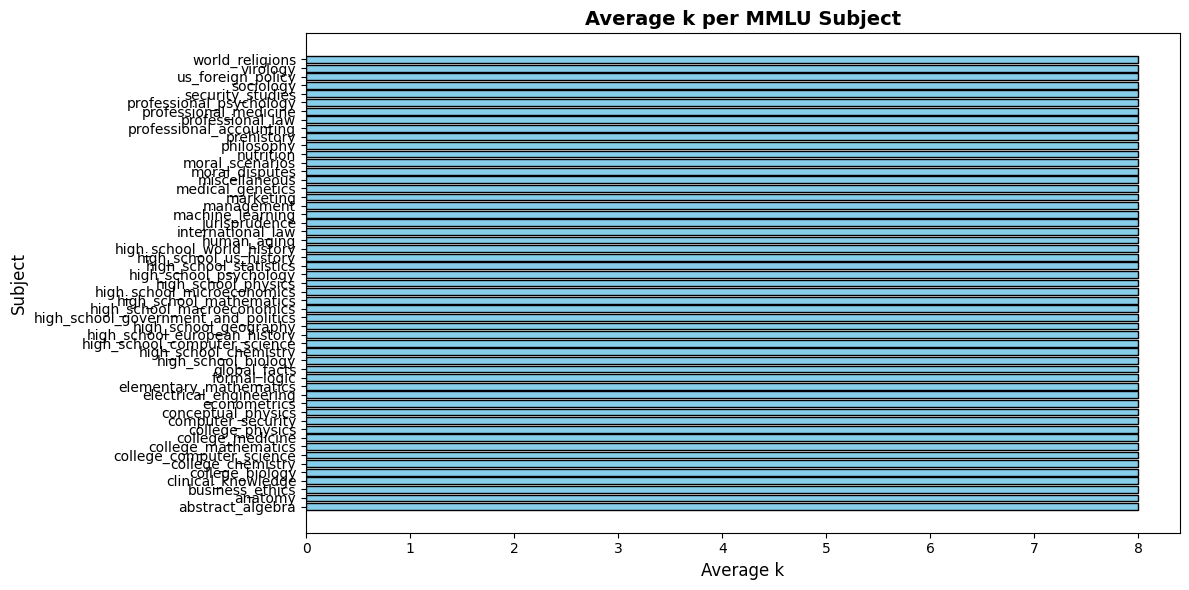

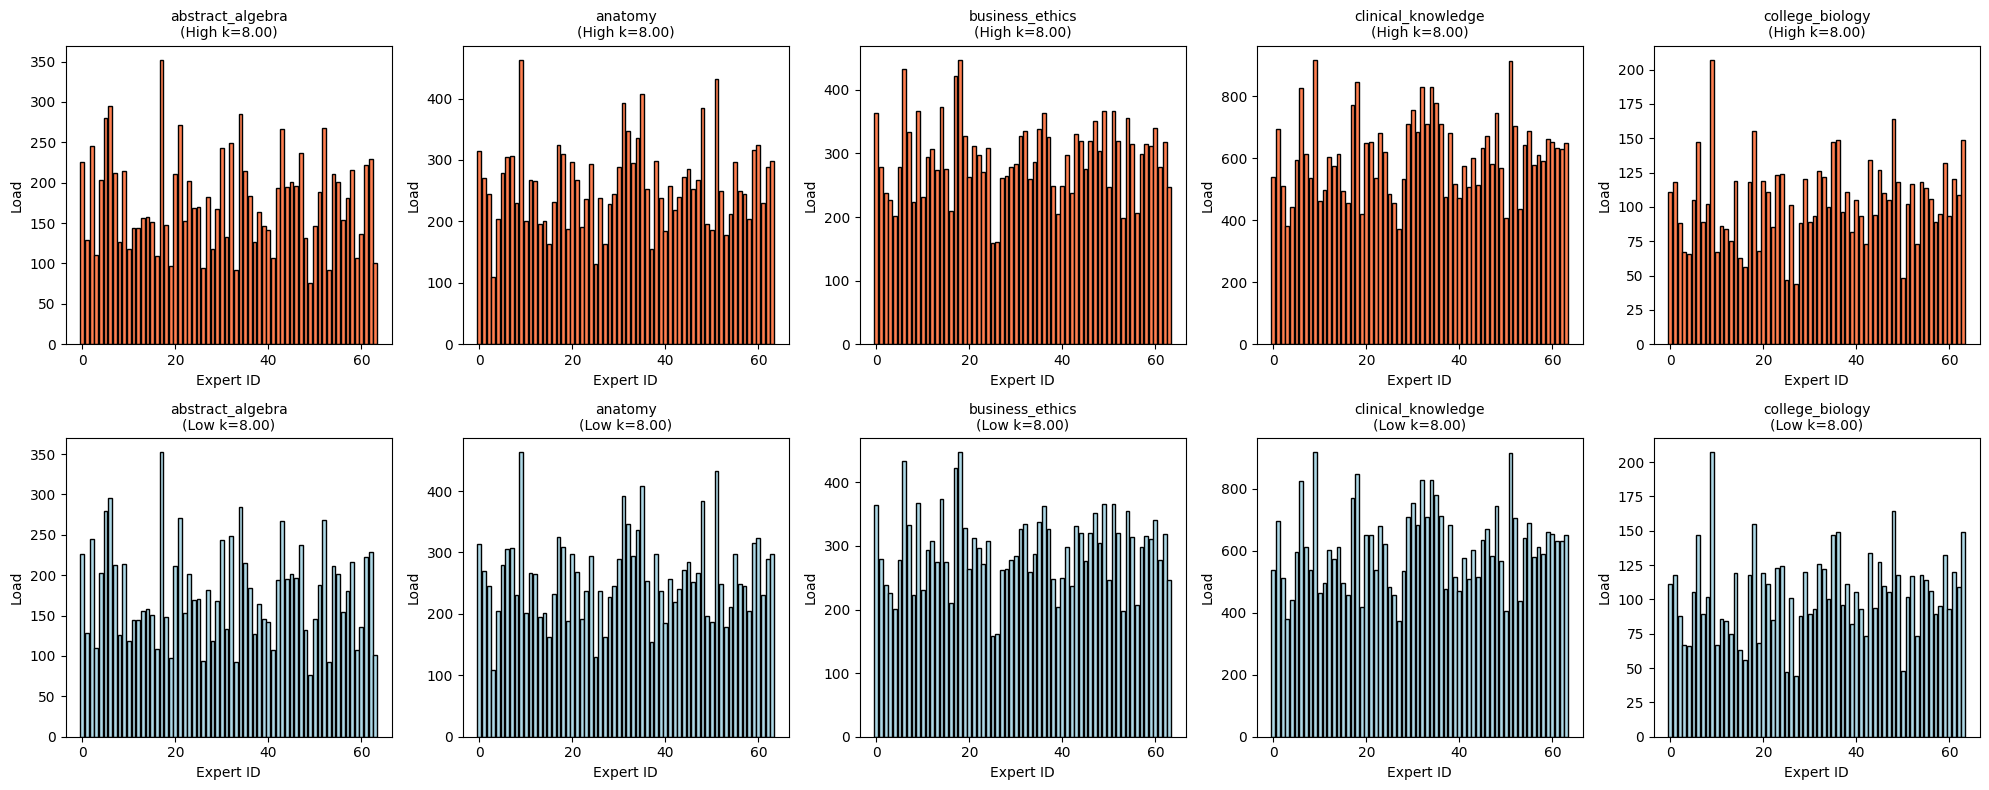

In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the pickle file
with open('mmlu_baseline_analysis.pkl', 'rb') as f:
  data = pickle.load(f)

# Aggregate per subject
subject_stats = defaultdict(lambda: {
  'expert_loads': defaultdict(int),
  'k_values': [],
  'count': 0,
  'correct': 0
})

for q in data['questions']:
  subject = q['subject']
  subject_stats[subject]['count'] += 1
  subject_stats[subject]['correct'] += int(q['correct'])
  subject_stats[subject]['k_values'].append(q['avg_k_all_layers'])

  # Aggregate expert usage for this subject
  for layer_name, layer_data in q['layers'].items():
      for expert_id, count in layer_data['expert_load'].items():
          subject_stats[subject]['expert_loads'][expert_id] += count

# Convert to DataFrame
rows = []
for subject, stats in subject_stats.items():
  rows.append({
      'subject': subject,
      'num_questions': stats['count'],
      'accuracy': 100 * stats['correct'] / stats['count'],
      'avg_k': sum(stats['k_values']) / len(stats['k_values']),
      'std_k': pd.Series(stats['k_values']).std(),
      'min_k': min(stats['k_values']),
      'max_k': max(stats['k_values']),
      'expert_loads': dict(stats['expert_loads'])  # Full dict
  })

df = pd.DataFrame(rows).sort_values('avg_k', ascending=False)

# Display results
print("=" * 80)
print("Per-Subject MMLU Analysis")
print("=" * 80)
print(df[['subject', 'num_questions', 'accuracy', 'avg_k', 'std_k']].to_string(index=False))

# Plot: Average k per subject
plt.figure(figsize=(12, 6))
plt.barh(df['subject'], df['avg_k'], color='skyblue', edgecolor='black')
plt.xlabel('Average k', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.title('Average k per MMLU Subject', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('avg_k_per_subject_baseline.png', dpi=150, bbox_inches='tight')
plt.show()

# Expert usage per subject (pick a few subjects to visualize)
top_subjects = df.nlargest(5, 'avg_k')['subject'].tolist()
bottom_subjects = df.nsmallest(5, 'avg_k')['subject'].tolist()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, subject in enumerate(top_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[0, i].bar(expert_ids, loads, color='coral', edgecolor='black')
  axes[0, i].set_title(f'{subject}\n(High k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[0, i].set_xlabel('Expert ID')
  axes[0, i].set_ylabel('Load')

for i, subject in enumerate(bottom_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[1, i].bar(expert_ids, loads, color='lightblue', edgecolor='black')
  axes[1, i].set_title(f'{subject}\n(Low k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[1, i].set_xlabel('Expert ID')
  axes[1, i].set_ylabel('Load')

plt.tight_layout()
plt.savefig('expert_usage_by_subject_baseline.png', dpi=150, bbox_inches='tight')
plt.show()

Per-Subject MMLU Analysis
                            subject  num_questions   accuracy    avg_k    std_k
       high_school_computer_science              1 100.000000 7.798258      NaN
       high_school_european_history              1 100.000000 7.732515      NaN
             electrical_engineering              1   0.000000 7.662778      NaN
                    college_biology              1   0.000000 7.660156      NaN
                   medical_genetics              1   0.000000 7.644792      NaN
             high_school_psychology              3 100.000000 7.642148 0.095065
                   abstract_algebra              1 100.000000 7.631912      NaN
                   machine_learning              4  25.000000 7.626590 0.053624
             high_school_us_history              1 100.000000 7.625910      NaN
                          nutrition              5  80.000000 7.623964 0.044447
              high_school_geography              7  71.428571 7.619444 0.057429
              

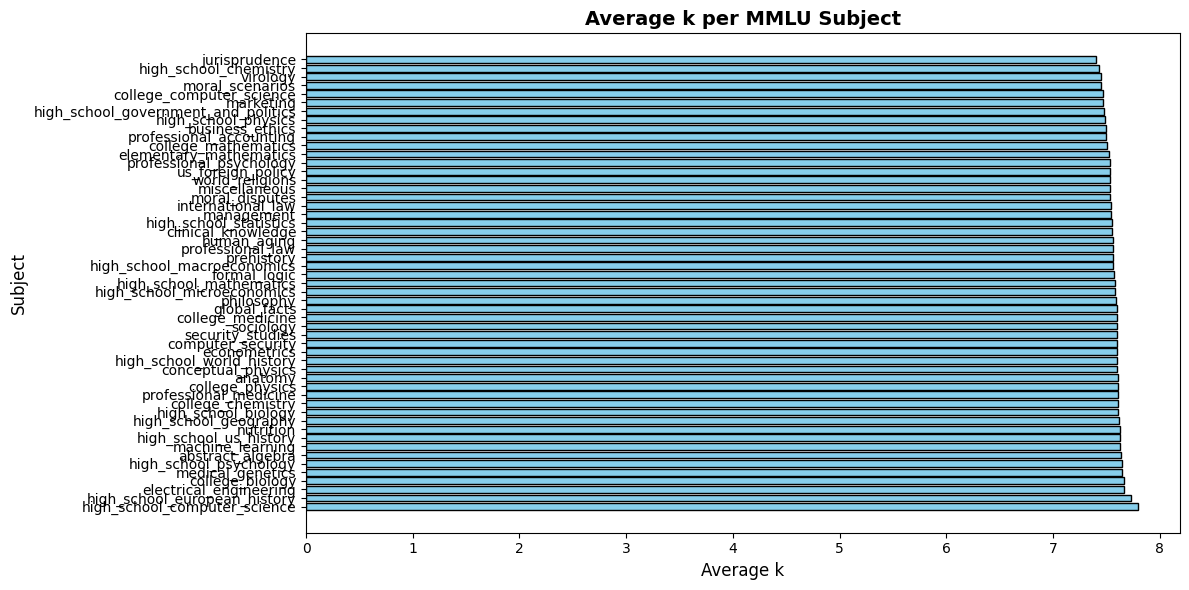

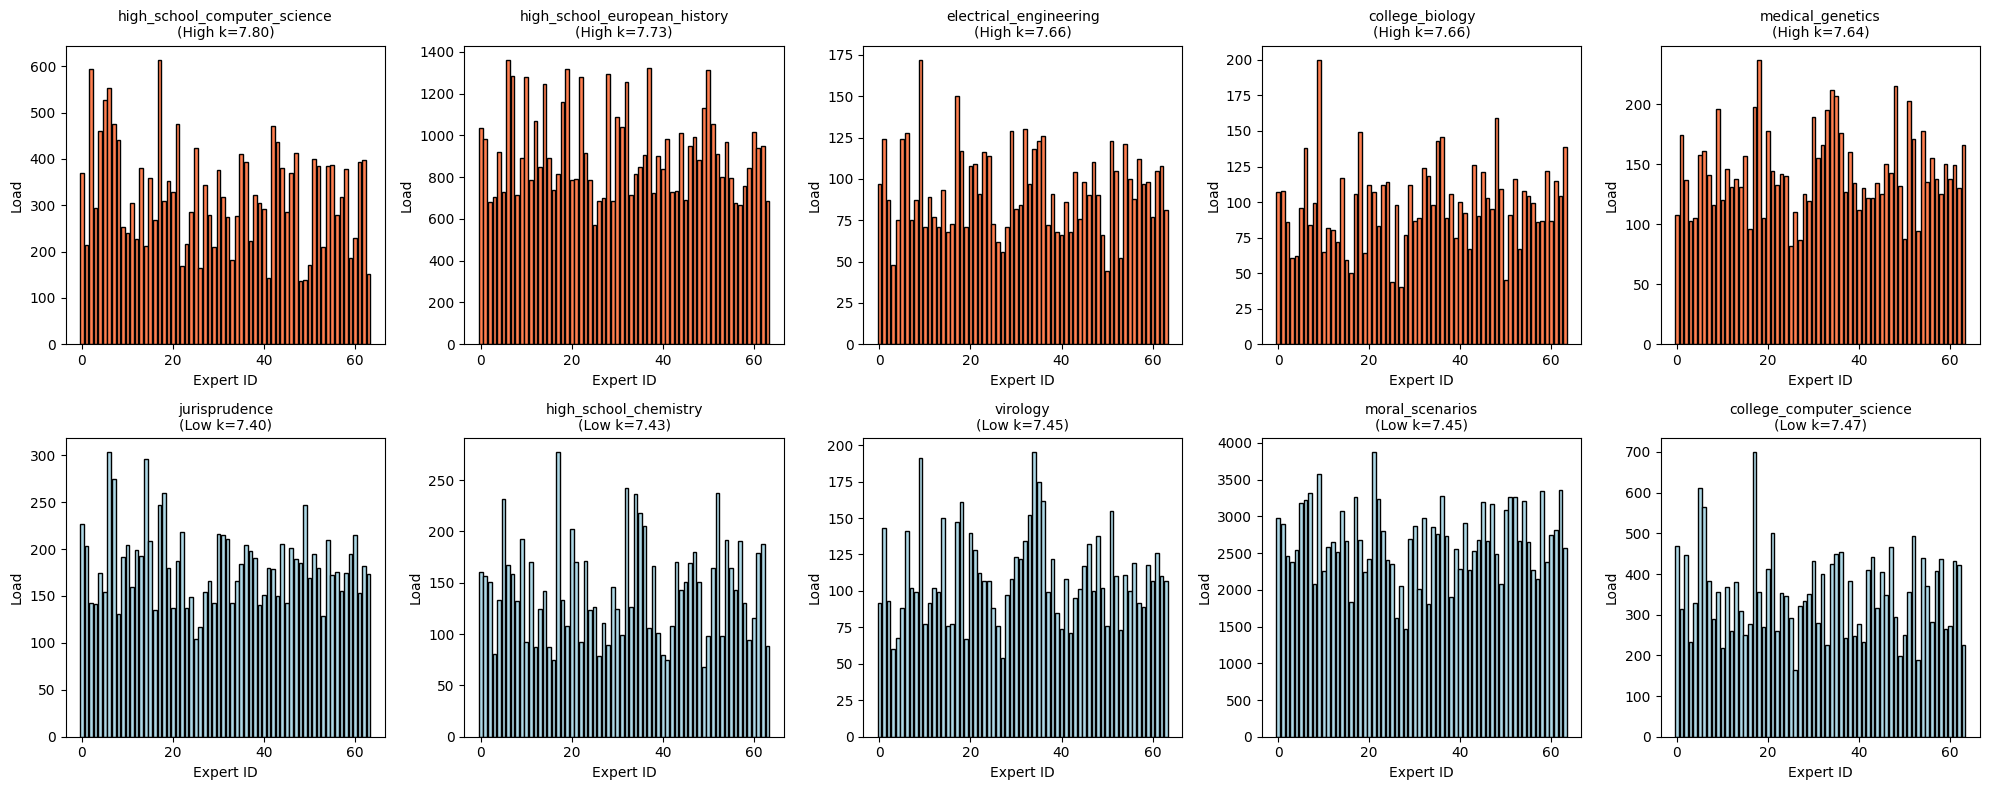

In [14]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the pickle file
with open('mmlu_k8_analysis.pkl', 'rb') as f:
  data = pickle.load(f)

# Aggregate per subject
subject_stats = defaultdict(lambda: {
  'expert_loads': defaultdict(int),
  'k_values': [],
  'count': 0,
  'correct': 0
})

for q in data['questions']:
  subject = q['subject']
  subject_stats[subject]['count'] += 1
  subject_stats[subject]['correct'] += int(q['correct'])
  subject_stats[subject]['k_values'].append(q['avg_k_all_layers'])

  # Aggregate expert usage for this subject
  for layer_name, layer_data in q['layers'].items():
      for expert_id, count in layer_data['expert_load'].items():
          subject_stats[subject]['expert_loads'][expert_id] += count

# Convert to DataFrame
rows = []
for subject, stats in subject_stats.items():
  rows.append({
      'subject': subject,
      'num_questions': stats['count'],
      'accuracy': 100 * stats['correct'] / stats['count'],
      'avg_k': sum(stats['k_values']) / len(stats['k_values']),
      'std_k': pd.Series(stats['k_values']).std(),
      'min_k': min(stats['k_values']),
      'max_k': max(stats['k_values']),
      'expert_loads': dict(stats['expert_loads'])  # Full dict
  })

df = pd.DataFrame(rows).sort_values('avg_k', ascending=False)

# Display results
print("=" * 80)
print("Per-Subject MMLU Analysis")
print("=" * 80)
print(df[['subject', 'num_questions', 'accuracy', 'avg_k', 'std_k']].to_string(index=False))

# Plot: Average k per subject
plt.figure(figsize=(12, 6))
plt.barh(df['subject'], df['avg_k'], color='skyblue', edgecolor='black')
plt.xlabel('Average k', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.title('Average k per MMLU Subject', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('avg_k_per_subject.png', dpi=150, bbox_inches='tight')
plt.show()

# Expert usage per subject (pick a few subjects to visualize)
top_subjects = df.nlargest(5, 'avg_k')['subject'].tolist()
bottom_subjects = df.nsmallest(5, 'avg_k')['subject'].tolist()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, subject in enumerate(top_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[0, i].bar(expert_ids, loads, color='coral', edgecolor='black')
  axes[0, i].set_title(f'{subject}\n(High k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[0, i].set_xlabel('Expert ID')
  axes[0, i].set_ylabel('Load')

for i, subject in enumerate(bottom_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[1, i].bar(expert_ids, loads, color='lightblue', edgecolor='black')
  axes[1, i].set_title(f'{subject}\n(Low k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[1, i].set_xlabel('Expert ID')
  axes[1, i].set_ylabel('Load')

plt.tight_layout()
plt.savefig('expert_usage_by_subject.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the pickle file
with open('mmlu_k16_analysis.pkl', 'rb') as f:
  data = pickle.load(f)

# Aggregate per subject
subject_stats = defaultdict(lambda: {
  'expert_loads': defaultdict(int),
  'k_values': [],
  'count': 0,
  'correct': 0
})

for q in data['questions']:
  subject = q['subject']
  subject_stats[subject]['count'] += 1
  subject_stats[subject]['correct'] += int(q['correct'])
  subject_stats[subject]['k_values'].append(q['avg_k_all_layers'])

  # Aggregate expert usage for this subject
  for layer_name, layer_data in q['layers'].items():
      for expert_id, count in layer_data['expert_load'].items():
          subject_stats[subject]['expert_loads'][expert_id] += count

# Convert to DataFrame
rows = []
for subject, stats in subject_stats.items():
  rows.append({
      'subject': subject,
      'num_questions': stats['count'],
      'accuracy': 100 * stats['correct'] / stats['count'],
      'avg_k': sum(stats['k_values']) / len(stats['k_values']),
      'std_k': pd.Series(stats['k_values']).std(),
      'min_k': min(stats['k_values']),
      'max_k': max(stats['k_values']),
      'expert_loads': dict(stats['expert_loads'])  # Full dict
  })

df = pd.DataFrame(rows).sort_values('avg_k', ascending=False)

# Display results
print("=" * 80)
print("Per-Subject MMLU Analysis")
print("=" * 80)
print(df[['subject', 'num_questions', 'accuracy', 'avg_k', 'std_k']].to_string(index=False))

# Plot: Average k per subject
plt.figure(figsize=(12, 6))
plt.barh(df['subject'], df['avg_k'], color='skyblue', edgecolor='black')
plt.xlabel('Average k', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.title('Average k per MMLU Subject', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('avg_k_per_subject_k16.png', dpi=150, bbox_inches='tight')
plt.show()

# Expert usage per subject (pick a few subjects to visualize)
top_subjects = df.nlargest(5, 'avg_k')['subject'].tolist()
bottom_subjects = df.nsmallest(5, 'avg_k')['subject'].tolist()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, subject in enumerate(top_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[0, i].bar(expert_ids, loads, color='coral', edgecolor='black')
  axes[0, i].set_title(f'{subject}\n(High k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[0, i].set_xlabel('Expert ID')
  axes[0, i].set_ylabel('Load')

for i, subject in enumerate(bottom_subjects):
  expert_loads = subject_stats[subject]['expert_loads']
  expert_ids = sorted(expert_loads.keys())
  loads = [expert_loads[e] for e in expert_ids]

  axes[1, i].bar(expert_ids, loads, color='lightblue', edgecolor='black')
  axes[1, i].set_title(f'{subject}\n(Low k={df[df.subject==subject].avg_k.values[0]:.2f})', fontsize=10)
  axes[1, i].set_xlabel('Expert ID')
  axes[1, i].set_ylabel('Load')

plt.tight_layout()
plt.savefig('expert_usage_by_subject_k16.png', dpi=150, bbox_inches='tight')
plt.show()

In [16]:
import pickle
import pandas as pd

# Load your analysis data
with open('arc_challenge_k16_analysis.pkl', 'rb') as f:
  data = pickle.load(f)

# Find all instances where a single token has k >= 14
high_k_tokens = []

for q in data['questions']:
  question_id = q.get('question_id')

  for layer_name, layer_data in q.get('layers', {}).items():
      k_per_token = layer_data.get('k_per_token', [])

      # Find token positions where k >= 14
      for token_idx, k_value in enumerate(k_per_token):
          if 14 <= k_value <= 16:  # Adjust threshold as needed
              high_k_tokens.append({
                  'question_id': question_id,
                  'subject': q.get('subject'),
                  'layer': layer_name,
                  'token_position': token_idx,
                  'k_value': k_value,
                  'total_tokens': len(k_per_token),
                  'question_text': q.get('question_text'),
                  'generated': q.get('generated'),
                  'prediction': q.get('prediction'),
                  'correct_answer': q.get('correct_answer'),
                  'correct': q.get('correct', False),
                  # Full k sequence for this layer
                  'k_sequence': k_per_token,
              })

print(f"Found {len(high_k_tokens)} individual tokens with k between 14 and 16")
print(f"Across {len(set(t['question_id'] for t in high_k_tokens))} unique questions")
print(f"Across {len(set(t['layer'] for t in high_k_tokens))} unique layers\n")

# Show distribution by layer
from collections import Counter
layer_counts = Counter(t['layer'] for t in high_k_tokens)
print("High-k tokens by layer:")
for layer, count in sorted(layer_counts.items()):
  print(f"  {layer}: {count} tokens")
print()

# Show some examples
for i, token_info in enumerate(high_k_tokens[:10]):  # First 10 instances
  print("=" * 100)
  print(f"High-k Token Instance {i+1}/{len(high_k_tokens)}")
  print("=" * 100)

  print(f"\n🎯 TOKEN INFO:")
  print(f"  Question ID: {token_info['question_id']}")
  print(f"  Layer: {token_info['layer']}")
  print(f"  Token position: {token_info['token_position']}/{token_info['total_tokens']}")
  print(f"  k value: {token_info['k_value']:.2f}")

  print(f"\n📝 QUESTION (Subject: {token_info['subject']}):")
  print(f"  {token_info['question_text']}")

  print(f"\n📤 OUTPUT:")
  print(f"  Generated: '{token_info['generated']}'")
  print(f"  Prediction: {token_info['prediction']}")
  print(f"  Correct answer: {token_info['correct_answer']}")
  print(f"  {'✓ Correct' if token_info['correct'] else '✗ Wrong'}")

  print(f"\n🔀 K SEQUENCE for this layer:")
  k_seq = token_info['k_sequence']
  print(f"  {k_seq}")
  print(f"  Position {token_info['token_position']} has k={token_info['k_value']:.2f} ⬅️")

  print()

# Analysis: Are high-k tokens more common in correct vs incorrect answers?
df = pd.DataFrame(high_k_tokens)
print("\n" + "=" * 100)
print("ANALYSIS: High-k tokens and correctness")
print("=" * 100)

correct_questions = df[df['correct'] == True]['question_id'].unique()
incorrect_questions = df[df['correct'] == False]['question_id'].unique()

print(f"\nQuestions with high-k tokens:")
print(f"  Correct: {len(correct_questions)}")
print(f"  Incorrect: {len(incorrect_questions)}")

# Position analysis: are high-k tokens at beginning or end of sequence?
df['relative_position'] = df['token_position'] / df['total_tokens']
print(f"\nToken position distribution:")
print(f"  Mean relative position: {df['relative_position'].mean():.2%}")
print(f"  First quarter (0-25%): {sum(df['relative_position'] < 0.25)} tokens")
print(f"  Middle (25-75%): {sum((df['relative_position'] >= 0.25) & (df['relative_position'] < 0.75))} tokens")
print(f"  Last quarter (75-100%): {sum(df['relative_position'] >= 0.75)} tokens")

# k value distribution
print(f"\nk value distribution:")
print(df['k_value'].describe())

Found 1625 individual tokens with k between 14 and 16
Across 199 unique questions
Across 16 unique layers

High-k tokens by layer:
  model.layers.0.mlp: 62 tokens
  model.layers.1.mlp: 18 tokens
  model.layers.10.mlp: 201 tokens
  model.layers.11.mlp: 91 tokens
  model.layers.12.mlp: 129 tokens
  model.layers.13.mlp: 80 tokens
  model.layers.14.mlp: 155 tokens
  model.layers.15.mlp: 152 tokens
  model.layers.2.mlp: 22 tokens
  model.layers.3.mlp: 41 tokens
  model.layers.4.mlp: 54 tokens
  model.layers.5.mlp: 61 tokens
  model.layers.6.mlp: 61 tokens
  model.layers.7.mlp: 108 tokens
  model.layers.8.mlp: 235 tokens
  model.layers.9.mlp: 155 tokens

High-k Token Instance 1/1625

🎯 TOKEN INFO:
  Question ID: 0
  Layer: model.layers.7.mlp
  Token position: 3/5
  k value: 15.00

📝 QUESTION (Subject: arc_challenge):
  Question: A group of engineers wanted to know how different building designs would respond during an earthquake. They made several models of buildings and tested each for its 

CORRELATION: Average k vs Correctness

Total questions: 200
Overall accuracy: 63.00%
Average k (all questions): 9.38
k range: [8.57, 10.34]

📊 K values by correctness:
  Correct answers (n=126):
    Mean k: 9.378
    Std k:  0.332

  Incorrect answers (n=74):
    Mean k: 9.383
    Std k:  0.338

📈 T-test:
  t-statistic: -0.0897
  p-value: 9.2860e-01
  ✗ No significant difference (p >= 0.05)

🔗 Point-biserial correlation:
  Correlation coefficient: -0.0064
  p-value: 9.2860e-01
  → Higher k is associated with INCORRECT answers

📊 Accuracy by k bins:
                 accuracy  count  accuracy_pct
k_bin                                         
(8.568, 8.765]     0.7778      9         77.78
(8.765, 8.962]     0.6000     15         60.00
(8.962, 9.159]     0.6250     24         62.50
(9.159, 9.355]     0.6190     42         61.90
(9.355, 9.552]     0.5000     42         50.00
(9.552, 9.749]     0.7805     41         78.05
(9.749, 9.946]     0.6500     20         65.00
(9.946, 10.143]    0.7

/tmp/ipykernel_132/2049001182.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([correct_df['avg_k'], incorrect_df['avg_k']],


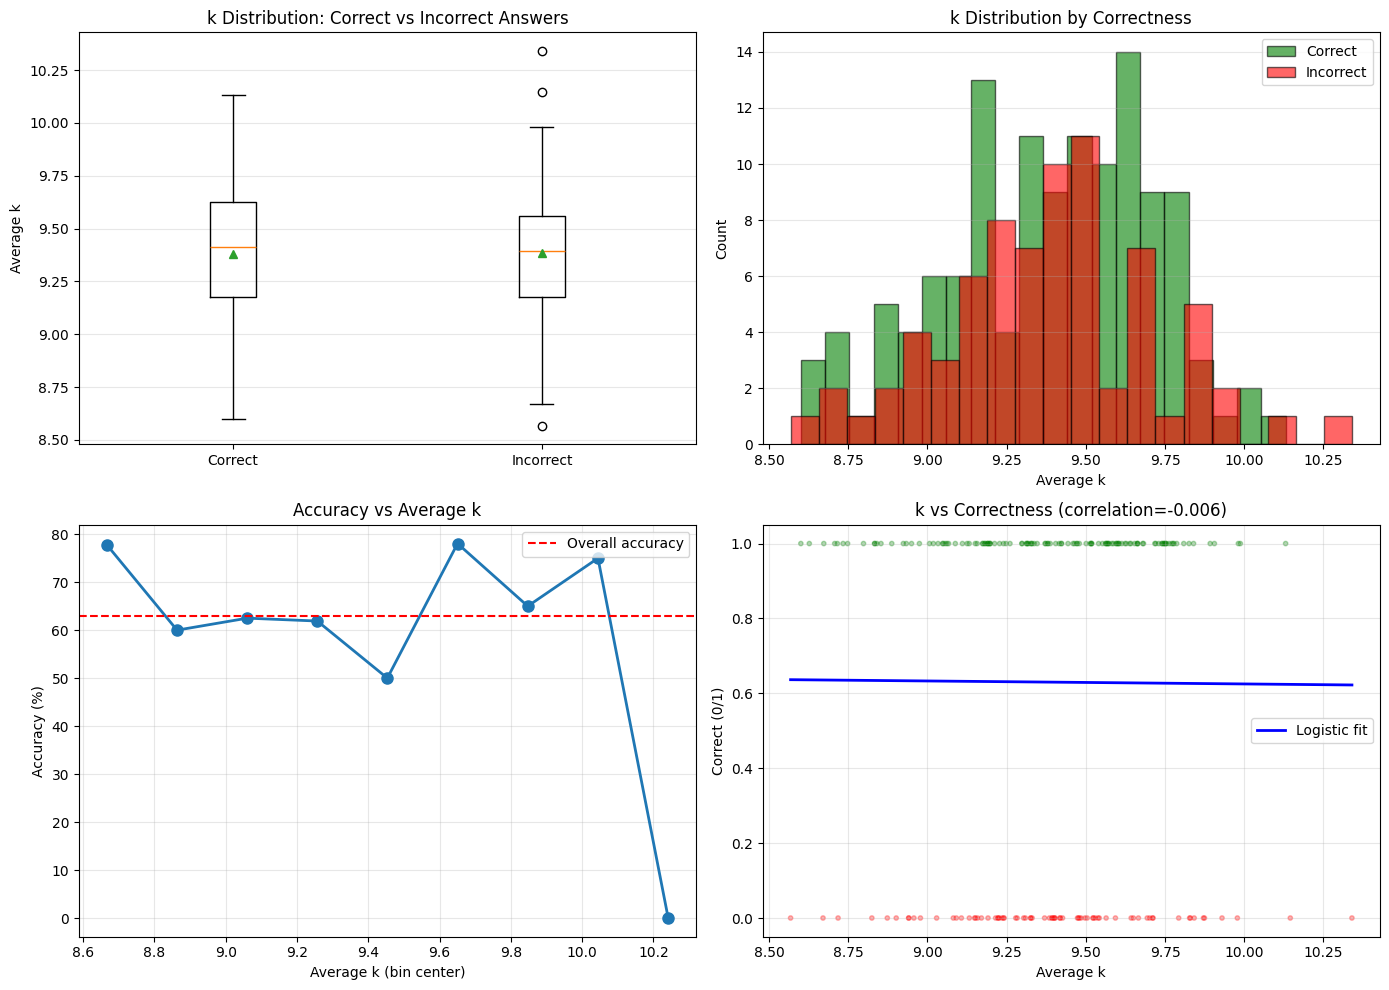


CONCLUSION
❌ No significant relationship between k and correctness
   Using more experts doesn't seem to help (or hurt) accuracy


In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load your analysis data
with open('arc_challenge_k16_analysis.pkl', 'rb') as f:
  data = pickle.load(f)

# Extract k and correctness for each question
question_analysis = []
for q in data['questions']:
  question_analysis.append({
      'avg_k': q.get('avg_k_all_layers', 0),
      'correct': int(q.get('correct', False)),
      'subject': q.get('subject', 'unknown')
  })

df = pd.DataFrame(question_analysis)

print("=" * 80)
print("CORRELATION: Average k vs Correctness")
print("=" * 80)

# Overall statistics
print(f"\nTotal questions: {len(df)}")
print(f"Overall accuracy: {100 * df['correct'].mean():.2f}%")
print(f"Average k (all questions): {df['avg_k'].mean():.2f}")
print(f"k range: [{df['avg_k'].min():.2f}, {df['avg_k'].max():.2f}]")

# Separate by correctness
correct_df = df[df['correct'] == 1]
incorrect_df = df[df['correct'] == 0]

print(f"\n📊 K values by correctness:")
print(f"  Correct answers (n={len(correct_df)}):")
print(f"    Mean k: {correct_df['avg_k'].mean():.3f}")
print(f"    Std k:  {correct_df['avg_k'].std():.3f}")
print(f"\n  Incorrect answers (n={len(incorrect_df)}):")
print(f"    Mean k: {incorrect_df['avg_k'].mean():.3f}")
print(f"    Std k:  {incorrect_df['avg_k'].std():.3f}")

# Statistical test
t_stat, p_value = stats.ttest_ind(correct_df['avg_k'], incorrect_df['avg_k'])
print(f"\n📈 T-test:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4e}")
if p_value < 0.05:
  print(f"  ✓ Statistically significant difference (p < 0.05)")
else:
  print(f"  ✗ No significant difference (p >= 0.05)")

# Point-biserial correlation (correlation between continuous and binary variable)
correlation, corr_p_value = stats.pointbiserialr(df['correct'], df['avg_k'])
print(f"\n🔗 Point-biserial correlation:")
print(f"  Correlation coefficient: {correlation:.4f}")
print(f"  p-value: {corr_p_value:.4e}")
if correlation > 0:
  print(f"  → Higher k is associated with CORRECT answers")
elif correlation < 0:
  print(f"  → Higher k is associated with INCORRECT answers")

# Bin by k values and compute accuracy per bin
bins = np.linspace(df['avg_k'].min(), df['avg_k'].max(), 10)
df['k_bin'] = pd.cut(df['avg_k'], bins=bins)

accuracy_by_k = df.groupby('k_bin', observed=True).agg({
  'correct': ['mean', 'count']
}).round(4)
accuracy_by_k.columns = ['accuracy', 'count']
accuracy_by_k['accuracy_pct'] = accuracy_by_k['accuracy'] * 100

print(f"\n📊 Accuracy by k bins:")
print(accuracy_by_k)

# VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Box plot: k distribution for correct vs incorrect
ax1 = axes[0, 0]
ax1.boxplot([correct_df['avg_k'], incorrect_df['avg_k']],
          labels=['Correct', 'Incorrect'],
          showmeans=True)
ax1.set_ylabel('Average k')
ax1.set_title('k Distribution: Correct vs Incorrect Answers')
ax1.grid(axis='y', alpha=0.3)

# 2. Histogram: k distribution colored by correctness
ax2 = axes[0, 1]
ax2.hist(correct_df['avg_k'], bins=20, alpha=0.6, label='Correct', color='green', edgecolor='black')
ax2.hist(incorrect_df['avg_k'], bins=20, alpha=0.6, label='Incorrect', color='red', edgecolor='black')
ax2.set_xlabel('Average k')
ax2.set_ylabel('Count')
ax2.set_title('k Distribution by Correctness')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Accuracy by k bins
ax3 = axes[1, 0]
k_bin_centers = [interval.mid for interval in accuracy_by_k.index]
ax3.plot(k_bin_centers, accuracy_by_k['accuracy_pct'], marker='o', linewidth=2, markersize=8)
ax3.axhline(100 * df['correct'].mean(), color='red', linestyle='--', label='Overall accuracy')
ax3.set_xlabel('Average k (bin center)')
ax3.set_ylabel('Accuracy (%)')
ax3.set_title('Accuracy vs Average k')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Scatter plot with trend line
ax4 = axes[1, 1]
colors = ['green' if c else 'red' for c in df['correct']]
ax4.scatter(df['avg_k'], df['correct'], alpha=0.3, c=colors, s=10)

# Add trend line (logistic regression visualization)
from sklearn.linear_model import LogisticRegression
X = df['avg_k'].values.reshape(-1, 1)
y = df['correct'].values
log_reg = LogisticRegression()
log_reg.fit(X, y)

k_range = np.linspace(df['avg_k'].min(), df['avg_k'].max(), 100).reshape(-1, 1)
prob_correct = log_reg.predict_proba(k_range)[:, 1]
ax4.plot(k_range, prob_correct, 'b-', linewidth=2, label='Logistic fit')

ax4.set_xlabel('Average k')
ax4.set_ylabel('Correct (0/1)')
ax4.set_title(f'k vs Correctness (correlation={correlation:.3f})')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('k_vs_correctness_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Final verdict
print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)
if correlation > 0.05 and p_value < 0.05:
  print("✅ Higher k IS associated with better accuracy (statistically significant)")
  print(f"   Questions with higher k are {abs(correlation)*100:.1f}% more likely to be correct")
elif correlation < -0.05 and p_value < 0.05:
  print("⚠️  Higher k IS associated with WORSE accuracy (statistically significant)")
  print(f"   Questions with higher k are {abs(correlation)*100:.1f}% more likely to be INCORRECT")
else:
  print("❌ No significant relationship between k and correctness")
  print("   Using more experts doesn't seem to help (or hurt) accuracy")